<a id="lib"></a>
# 1. Import Libraries

In [26]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [27]:
plt.rcParams['figure.figsize'] = [15, 8]

<a id="prep"></a>
# 2. Data Preparation

### 2.1 Read the dataset, check it's shape and print the first five observations and the last five observations

In [74]:
df=pd.read_csv('MLZilla_Case_Data.csv')

- Data Definition
https://bit.ly/DataDefinition

In [29]:
df.shape

(212999, 49)

In [30]:
df.head()

id  member_id  loan_amnt  funded_amnt        term  int_rate  \
0  60516983   64537751      20000        20000   36 months     12.29   
1  60187139   64163931      11000        11000   36 months     12.69   
2  60356453   64333218       7000         7000   36 months      9.99   
3  59955769   63900496      10000        10000   36 months     10.99   
4  58703693   62544456       9550         9550   36 months     19.99   

   installment grade sub_grade              emp_title  ... last_credit_pull_d  \
0       667.06     C        C1       Accounting Clerk  ...             Jan-16   
1       369.00     C        C2  Accounts Payable Lead  ...             Jan-16   
2       225.84     B        B3                  Nurse  ...             Jan-16   
3       327.34     B        B4        Service Manager  ...             Jan-16   
4       354.87     E        E4                    NaN  ...             Jan-16   

  collections_12_mths_ex_med  mths_since_last_major_derog application_type  \
0                          0                          NaN       INDIVIDUAL   
1                          0                         79.0       INDIVIDUAL   
2                          0                          NaN       INDIVIDUAL   
3                          0                          NaN       INDIVIDUAL   
4                          0                         69.0       INDIVIDUAL   

  annual_inc_joint dti_joint acc_now_delinq tot_coll_amt  tot_cur_bal  \
0              NaN       NaN              0            0        52303   
1              NaN       NaN              0          332       175731   
2              NaN       NaN              0            0       202012   
3              NaN       NaN              0            0       108235   
4              NaN       NaN              0            0        45492   

   total_rev_hi_lim  
0             41000  
1             13100  
2             16300  
3             34750  
4             14100  

[5 rows x 49 columns]

In [31]:
df.tail()

id  member_id  loan_amnt  funded_amnt        term  int_rate  \
212994  54067695   57608436      20000        20000   36 months     13.33   
212995  54414443   57995197       6000         6000   36 months     11.53   
212996  54474829   58055589      18000        18000   60 months     19.19   
212997  54354054   57934790       7050         7050   36 months     15.61   
212998  54345305   57926074       3500         3500   36 months     13.99   

        installment grade sub_grade             emp_title  ...  \
212994       677.07     C        C3               Vp sale  ...   
212995       197.95     B        B5                 Owner  ...   
212996       468.82     E        E3  Production Processor  ...   
212997       246.51     D        D1                   NaN  ...   
212998       119.61     C        C4    Medical assistant   ...   

       last_credit_pull_d collections_12_mths_ex_med  \
212994             Jan-16                          0   
212995             Jan-16                          0   
212996             Jan-16                          1   
212997             Jan-16                          0   
212998             Jan-16                          0   

        mths_since_last_major_derog application_type annual_inc_joint  \
212994                         45.0       INDIVIDUAL              NaN   
212995                         60.0       INDIVIDUAL              NaN   
212996                          NaN       INDIVIDUAL              NaN   
212997                          NaN       INDIVIDUAL              NaN   
212998                         74.0       INDIVIDUAL              NaN   

       dti_joint acc_now_delinq tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
212994       NaN              0          574        21474              5400  
212995       NaN              0            0         2176              4200  
212996       NaN              0         4404         8414             15300  
212997       NaN              0            0       159660             26800  
212998       NaN              0            0       174695             15600  

[5 rows x 49 columns]

## 2.2 Checking the datatypes of every column and changing them wherever neccessary

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           212999 non-null  int64  
 1   member_id                    212999 non-null  int64  
 2   loan_amnt                    212999 non-null  int64  
 3   funded_amnt                  212999 non-null  int64  
 4   term                         212999 non-null  object 
 5   int_rate                     212999 non-null  float64
 6   installment                  212999 non-null  float64
 7   grade                        212999 non-null  object 
 8   sub_grade                    212999 non-null  object 
 9   emp_title                    200209 non-null  object 
 10  emp_length                   200232 non-null  object 
 11  home_ownership               212999 non-null  object 
 12  annual_inc                   212999 non-null  float64
 13 

In [33]:
#Extracting the number of months from Term and making it a numeric column

In [75]:
df['term']=df['term'].str.replace('months','').astype(int)

In [35]:
#Cross-Verification after changing the datatypes

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           212999 non-null  int64  
 1   member_id                    212999 non-null  int64  
 2   loan_amnt                    212999 non-null  int64  
 3   funded_amnt                  212999 non-null  int64  
 4   term                         212999 non-null  int32  
 5   int_rate                     212999 non-null  float64
 6   installment                  212999 non-null  float64
 7   grade                        212999 non-null  object 
 8   sub_grade                    212999 non-null  object 
 9   emp_title                    200209 non-null  object 
 10  emp_length                   200232 non-null  object 
 11  home_ownership               212999 non-null  object 
 12  annual_inc                   212999 non-null  float64
 13 

**So we have**

- **33 numeric variables** 
- **16 categorical variables**

### 2.3 Understanding our numerical and categorical variables

In [37]:
for i in df.select_dtypes(include=object).columns:
    print(f"The number of unique characters in column {i} are {df[i].nunique()}")
    print(df[i].unique())
    print("----"*20)

The number of unique characters in column grade are 7
['C' 'B' 'E' 'D' 'A' 'F' 'G']
--------------------------------------------------------------------------------
The number of unique characters in column sub_grade are 35
['C1' 'C2' 'B3' 'B4' 'E4' 'C5' 'D4' 'E1' 'D3' 'A5' 'D5' 'B1' 'E2' 'A2'
 'E3' 'F5' 'D2' 'G5' 'C4' 'B5' 'G2' 'G1' 'F2' 'D1' 'F1' 'C3' 'B2' 'E5'
 'F4' 'A4' 'A3' 'F3' 'G4' 'G3' 'A1']
--------------------------------------------------------------------------------
The number of unique characters in column emp_title are 69666
['Accounting Clerk' 'Accounts Payable Lead' 'Nurse' ...
 'Centerpoint Entergy' 'Vp sale' 'Production Processor']
--------------------------------------------------------------------------------
The number of unique characters in column emp_length are 11
['1 year' '7 years' '6 years' '10+ years' nan '8 years' '9 years'
 '3 years' '4 years' '< 1 year' '2 years' '5 years']
--------------------------------------------------------------------------------


In [38]:
df.describe(include=np.number)

id     member_id      loan_amnt    funded_amnt          term  \
count  2.129990e+05  2.129990e+05  212999.000000  212999.000000  212999.00000   
mean   6.103515e+07  6.515927e+07   15257.965530   15257.965530      43.88353   
std    4.734904e+06  5.215173e+06    8611.713377    8611.713377      11.27188   
min    5.670500e+04  7.082500e+04    1000.000000    1000.000000      36.00000   
25%    5.783411e+07  6.158651e+07    8500.000000    8500.000000      36.00000   
50%    6.137900e+07  6.549753e+07   14000.000000   14000.000000      36.00000   
75%    6.503778e+07  6.956436e+07   20000.000000   20000.000000      60.00000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000      60.00000   

            int_rate    installment    annual_inc            dti  \
count  212999.000000  212999.000000  2.129990e+05  212999.000000   
mean       12.401658     440.842921  7.780071e+04      19.360817   
std         4.249365     245.858646  8.188065e+04      31.925871   
min         5.320000      30.120000  0.000000e+00       0.000000   
25%         9.170000     262.230000  4.700000e+04      12.660000   
50%        12.290000     382.870000  6.500000e+04      18.720000   
75%        14.650000     578.790000  9.250000e+04      25.520000   
max        28.990000    1445.460000  9.000000e+06    9999.000000   

         delinq_2yrs  ...  collection_recovery_fee  last_pymnt_amnt  \
count  212999.000000  ...            212999.000000    212999.000000   
mean        0.347462  ...                 0.715744       436.159535   
std         0.921209  ...                22.893806       450.680782   
min         0.000000  ...                 0.000000         0.000000   
25%         0.000000  ...                 0.000000       250.000000   
50%         0.000000  ...                 0.000000       375.430000   
75%         0.000000  ...                 0.000000       572.600000   
max        30.000000  ...              2037.493800     35330.490000   

       collections_12_mths_ex_med  mths_since_last_major_derog  \
count               212999.000000                 62365.000000   
mean                     0.021643                    45.468356   
std                      0.161511                    22.645675   
min                      0.000000                     0.000000   
25%                      0.000000                    28.000000   
50%                      0.000000                    45.000000   
75%                      0.000000                    63.000000   
max                      7.000000                   171.000000   

       annual_inc_joint   dti_joint  acc_now_delinq   tot_coll_amt  \
count        441.000000  439.000000   212999.000000  212999.000000   
mean      107574.096327   18.320114        0.005718     261.951652   
std        47921.057382    7.230012        0.081045    2215.188372   
min        17950.000000    3.050000        0.000000       0.000000   
25%        75001.000000   13.185000        0.000000       0.000000   
50%       100000.000000   17.750000        0.000000       0.000000   
75%       131000.000000   22.650000        0.000000       0.000000   
max       410000.000000   43.860000        5.000000  380757.000000   

        tot_cur_bal  total_rev_hi_lim  
count  2.129990e+05      2.129990e+05  
mean   1.416537e+05      3.444425e+04  
std    1.568766e+05      3.531827e+04  
min    0.000000e+00      0.000000e+00  
25%    3.143300e+04      1.460000e+04  
50%    8.138600e+04      2.510000e+04  
75%    2.097080e+05      4.260000e+04  
max    4.127799e+06      1.641300e+06  

[8 rows x 33 columns]

In [39]:
df.describe(exclude=np.number)

grade sub_grade emp_title emp_length home_ownership  \
count   212999    212999    200209     200232         212999   
unique       7        35     69666         11              4   
top          B        C1   Teacher  10+ years       MORTGAGE   
freq     62657     13579      4149      71879         105999   

       verification_status issue_d loan_status             purpose  \
count               212999  212999      212999              212999   
unique                   3      12           2                  13   
top        Source Verified  Oct-15     Current  debt_consolidation   
freq                 88235   47208      210226              122831   

                     title earliest_cr_line initial_list_status last_pymnt_d  \
count               212984           212999              212999       204510   
unique                  14              650                   2           12   
top     Debt consolidation           Aug-02                   w       Jan-16   
freq                122825             1598              149678       157305   

       next_pymnt_d last_credit_pull_d application_type  
count        210226             212992           212999  
unique            3                 13                2  
top          Feb-16             Jan-16       INDIVIDUAL  
freq         185207             210920           212558

### 2.4 Missing Value Treatment

In [40]:
val = df.isnull().sum()
percentage = 100*df.isnull().sum()/df.shape[0]

missing_df=pd.concat([val, percentage], axis=1)
missing_df.columns = ['value', 'percentage_value']
missing_df.sort_values(by='percentage_value', ascending=False)

value  percentage_value
dti_joint                    212560         99.793896
annual_inc_joint             212558         99.792957
mths_since_last_major_derog  150634         70.720520
mths_since_last_delinq       103371         48.531214
emp_title                     12790          6.004723
emp_length                    12767          5.993925
last_pymnt_d                   8489          3.985465
next_pymnt_d                   2773          1.301884
revol_util                       82          0.038498
title                            15          0.007042
last_credit_pull_d                7          0.003286
application_type                  0          0.000000
total_rec_late_fee                0          0.000000
initial_list_status               0          0.000000
out_prncp                         0          0.000000
total_pymnt                       0          0.000000
tot_cur_bal                       0          0.000000
total_rec_prncp                   0          0.000000
total_rec_int                     0          0.000000
recoveries                        0          0.000000
acc_now_delinq                    0          0.000000
collection_recovery_fee           0          0.000000
tot_coll_amt                      0          0.000000
last_pymnt_amnt                   0          0.000000
total_acc                         0          0.000000
collections_12_mths_ex_med        0          0.000000
id                                0          0.000000
pub_rec                           0          0.000000
revol_bal                         0          0.000000
annual_inc                        0          0.000000
loan_amnt                         0          0.000000
funded_amnt                       0          0.000000
term                              0          0.000000
int_rate                          0          0.000000
installment                       0          0.000000
grade                             0          0.000000
sub_grade                         0          0.000000
home_ownership                    0          0.000000
verification_status               0          0.000000
member_id                         0          0.000000
issue_d                           0          0.000000
loan_status                       0          0.000000
purpose                           0          0.000000
dti                               0          0.000000
delinq_2yrs                       0          0.000000
earliest_cr_line                  0          0.000000
inq_last_6mths                    0          0.000000
open_acc                          0          0.000000
total_rev_hi_lim                  0          0.000000

**Approach for handling missing values** 

- Any column which is having almost 50% or more data missing, will be dropped (in Dimensionality Reduction section)
- Anything less than 6% will be imputed 

In [76]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['title'].fillna(df['title'].mode()[0], inplace=True)
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)

**Note**

- At the moment, the missing values in (emp_title, last_pymnt_d, next_pymnt_d, last_credit_pull_d) which are not yet been treated.
- We have purposefully not treated them as the appropraite treatment will be decided based on the significance of the column 

In [42]:
val = df.isnull().sum()
percentage = 100*df.isnull().sum()/df.shape[0]

missing_df=pd.concat([val, percentage], axis=1)
missing_df.columns = ['value', 'percentage_value']
missing_df.sort_values(by='percentage_value', ascending=False)

value  percentage_value
dti_joint                    212560         99.793896
annual_inc_joint             212558         99.792957
mths_since_last_major_derog  150634         70.720520
mths_since_last_delinq       103371         48.531214
emp_title                     12790          6.004723
last_pymnt_d                   8489          3.985465
next_pymnt_d                   2773          1.301884
last_credit_pull_d                7          0.003286
recoveries                        0          0.000000
initial_list_status               0          0.000000
out_prncp                         0          0.000000
total_pymnt                       0          0.000000
total_rec_prncp                   0          0.000000
total_rec_int                     0          0.000000
total_rec_late_fee                0          0.000000
id                                0          0.000000
collection_recovery_fee           0          0.000000
last_pymnt_amnt                   0          0.000000
revol_util                        0          0.000000
collections_12_mths_ex_med        0          0.000000
application_type                  0          0.000000
acc_now_delinq                    0          0.000000
tot_coll_amt                      0          0.000000
tot_cur_bal                       0          0.000000
total_acc                         0          0.000000
pub_rec                           0          0.000000
revol_bal                         0          0.000000
annual_inc                        0          0.000000
loan_amnt                         0          0.000000
funded_amnt                       0          0.000000
term                              0          0.000000
int_rate                          0          0.000000
installment                       0          0.000000
grade                             0          0.000000
sub_grade                         0          0.000000
emp_length                        0          0.000000
home_ownership                    0          0.000000
verification_status               0          0.000000
member_id                         0          0.000000
issue_d                           0          0.000000
loan_status                       0          0.000000
purpose                           0          0.000000
title                             0          0.000000
dti                               0          0.000000
delinq_2yrs                       0          0.000000
earliest_cr_line                  0          0.000000
inq_last_6mths                    0          0.000000
open_acc                          0          0.000000
total_rev_hi_lim                  0          0.000000

### 2.5 Outlier Treatment

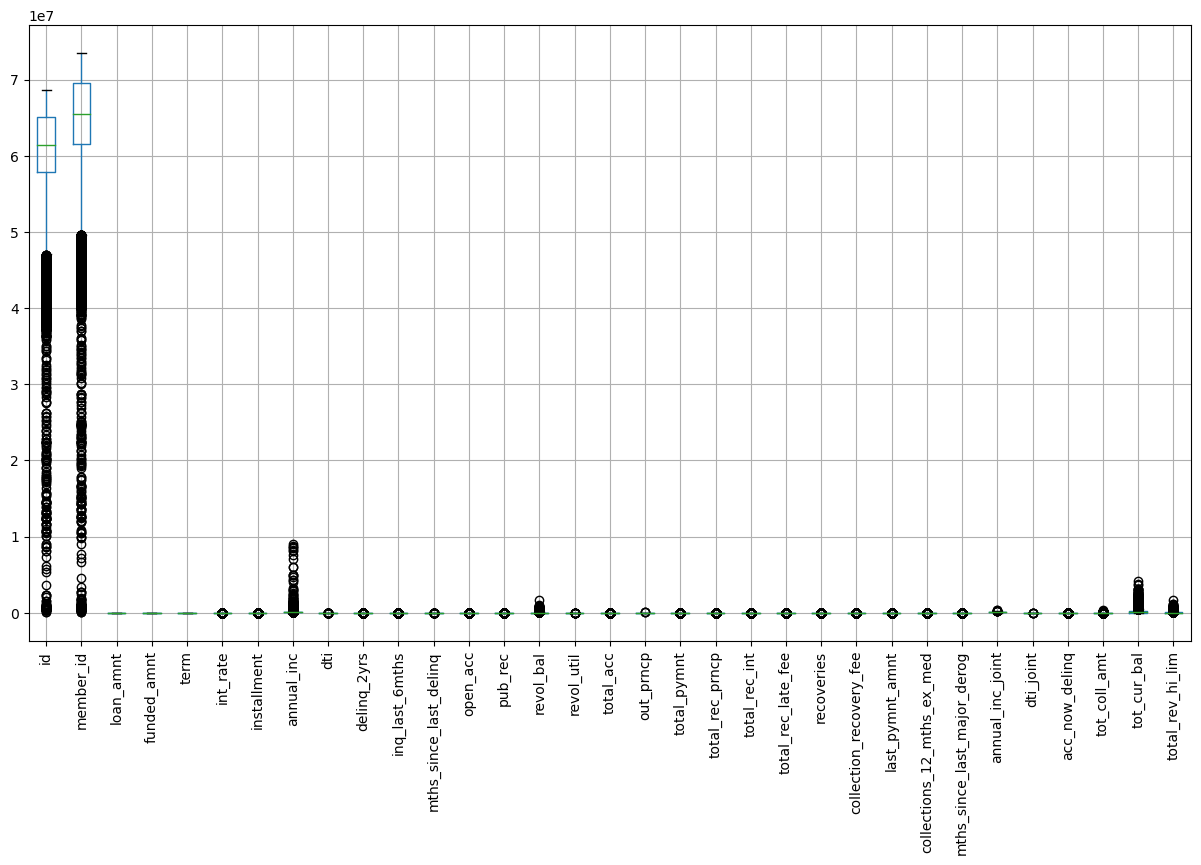

In [43]:
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

**Inference**
- We can see there are outliers in the dataset from the above visualisation but at the moment we are not able to take the efficient decision on weather to drop the outliers, cap them or transform them.
- As we are working on Finance Model, we would like to use feature selection method, to identify the best columns for building a model and then specific to those columns we can make a wise decision.

### 3. EDA

### Understanding the distribution in our Categorical and Numeric Columns

**Categorical columns**

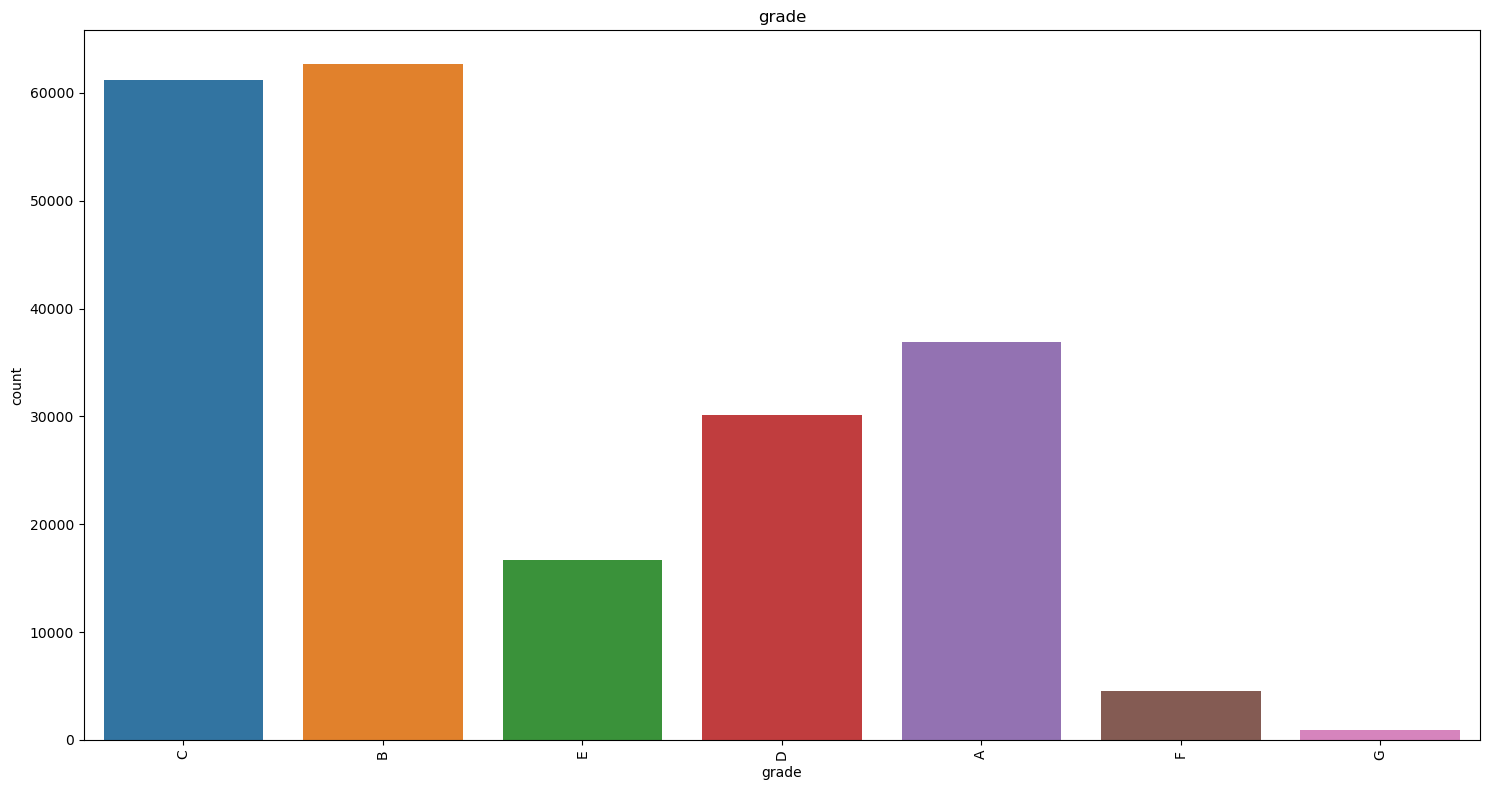

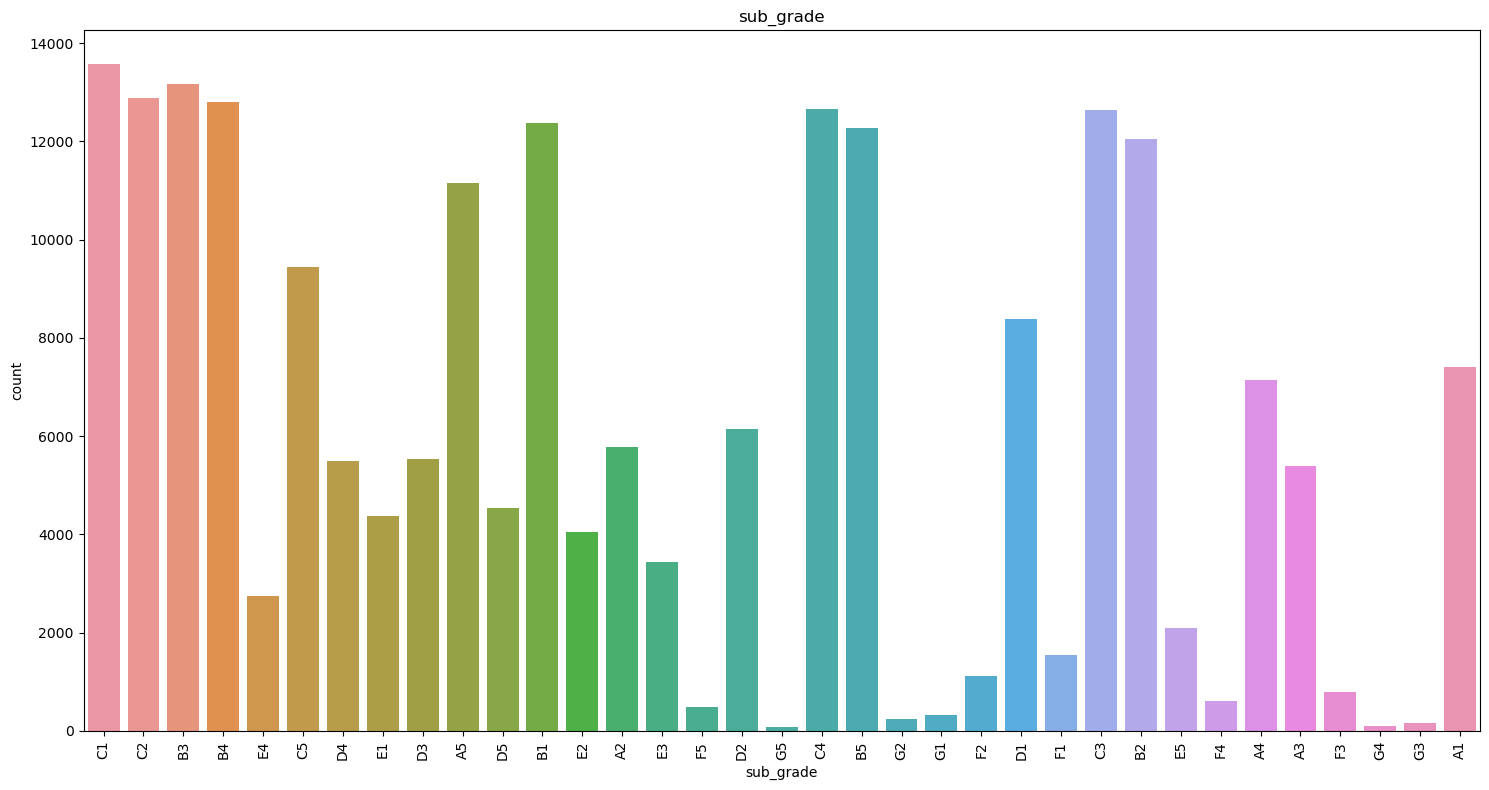

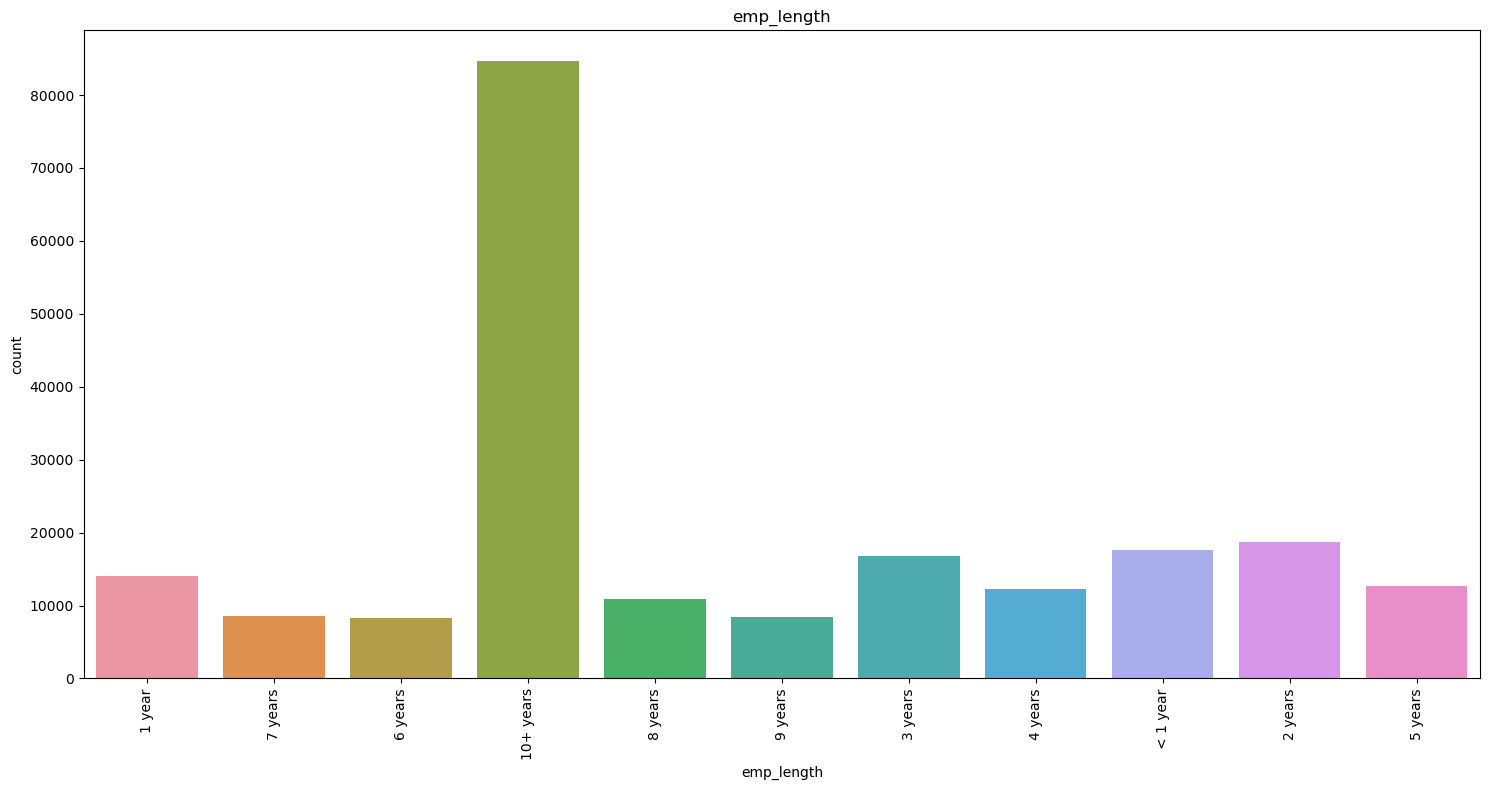

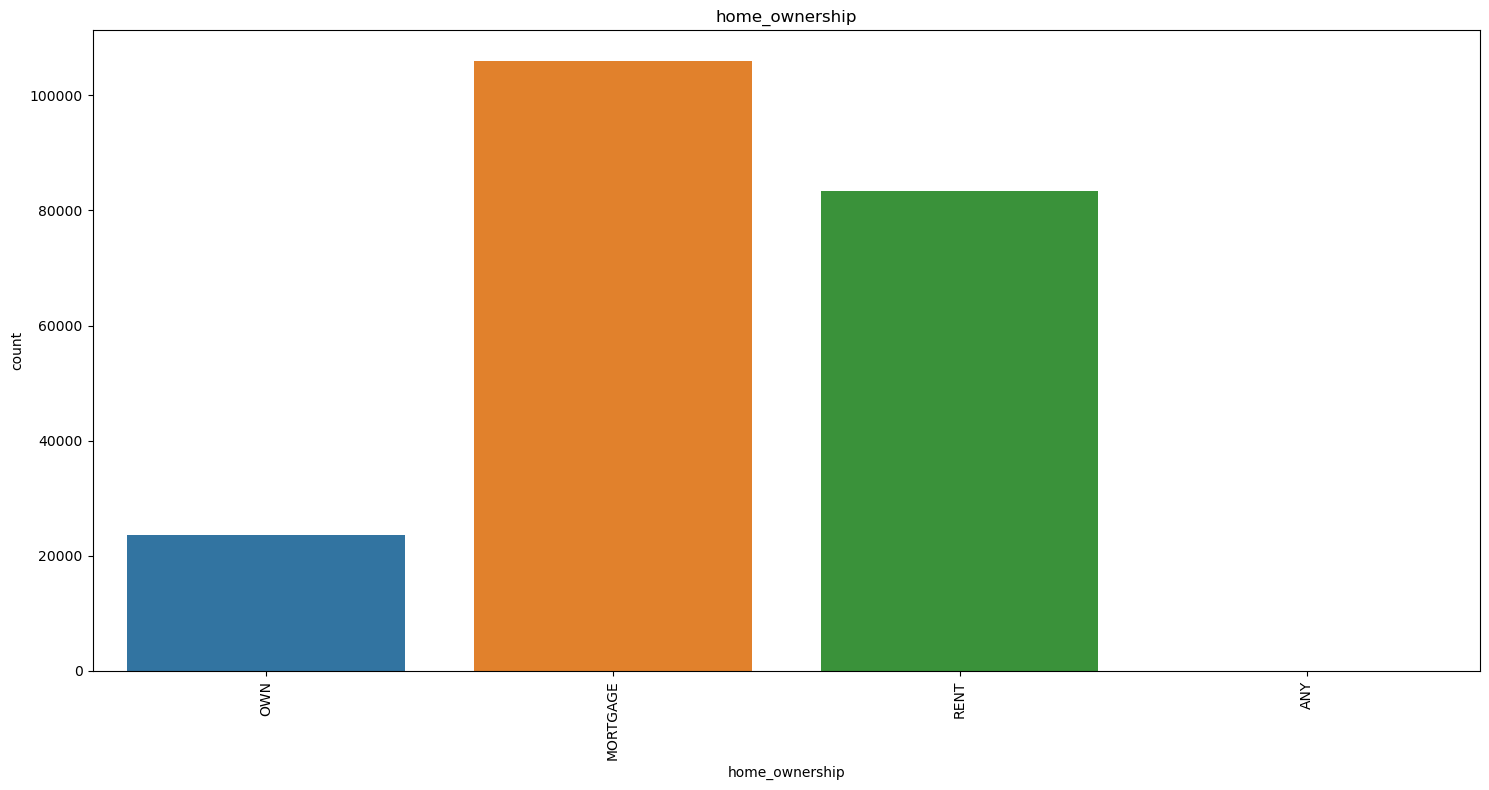

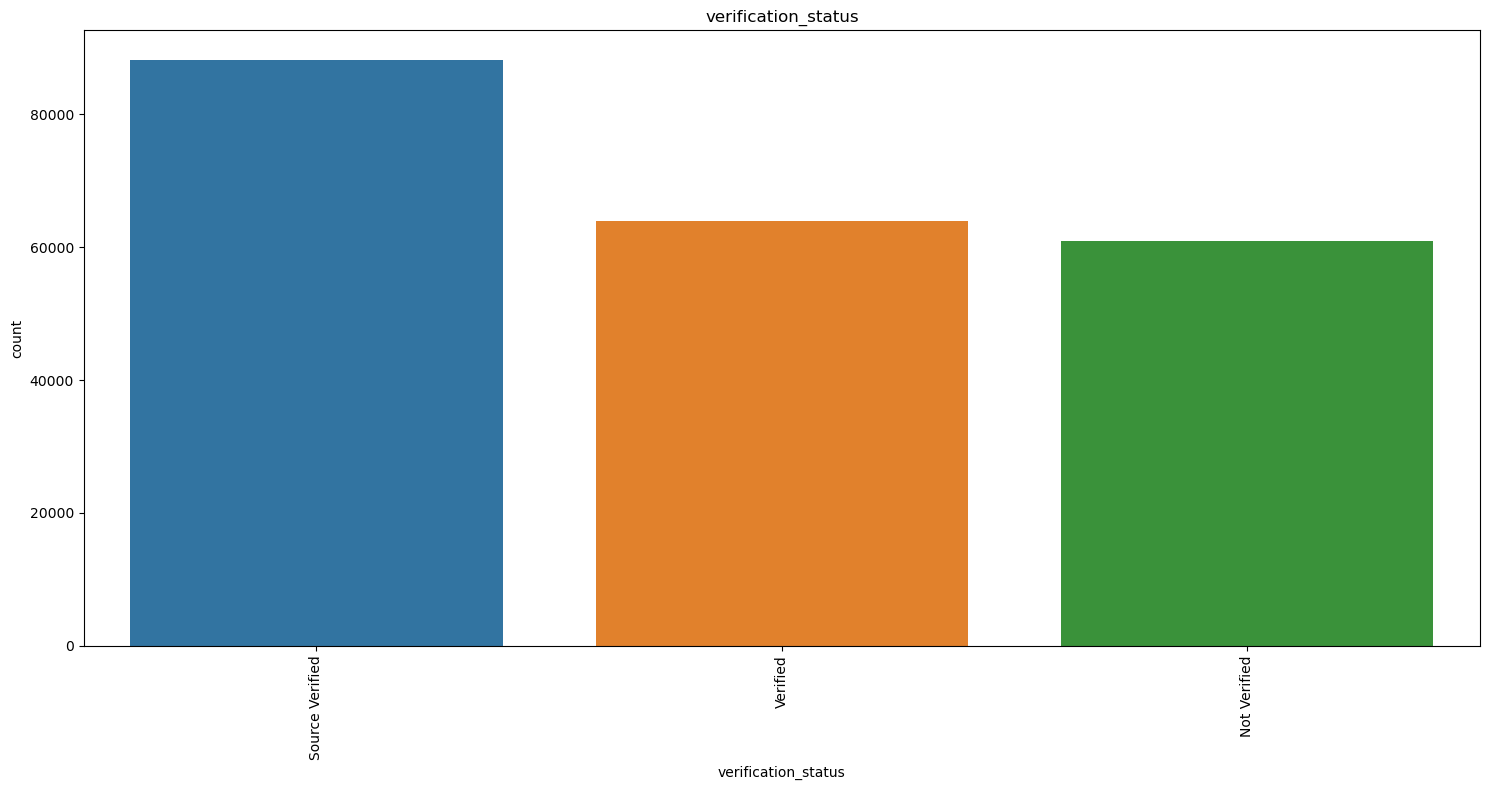

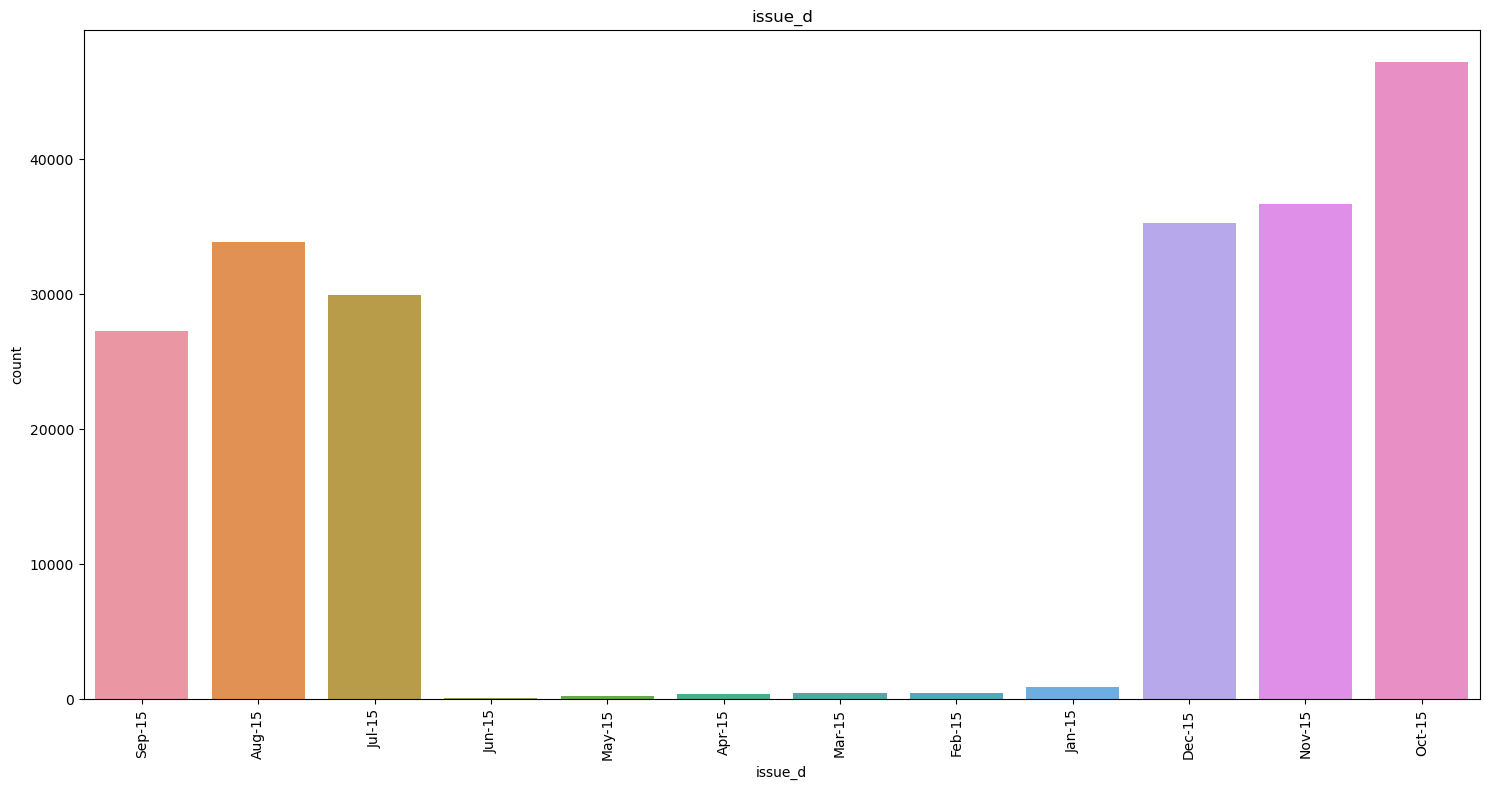

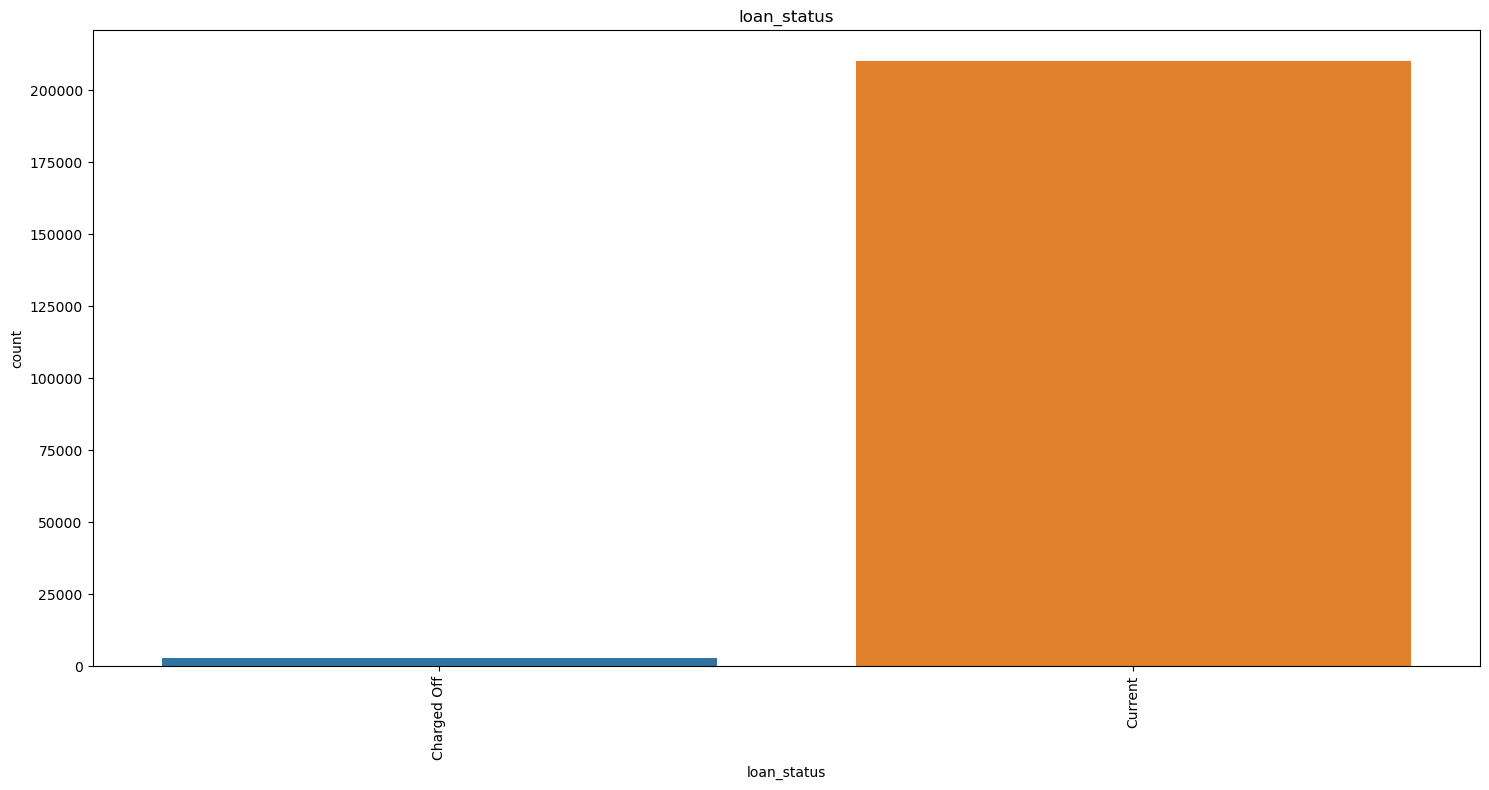

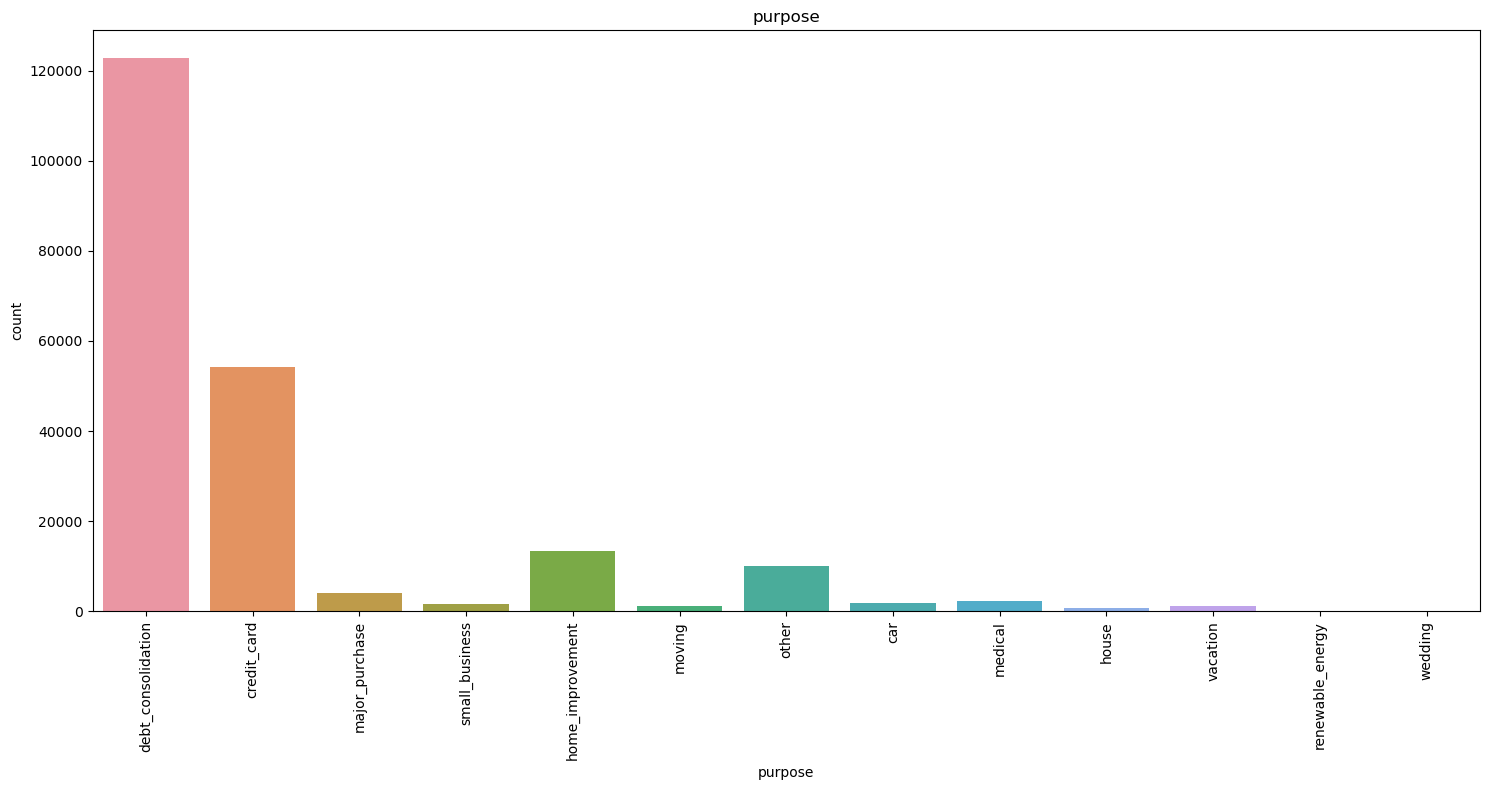

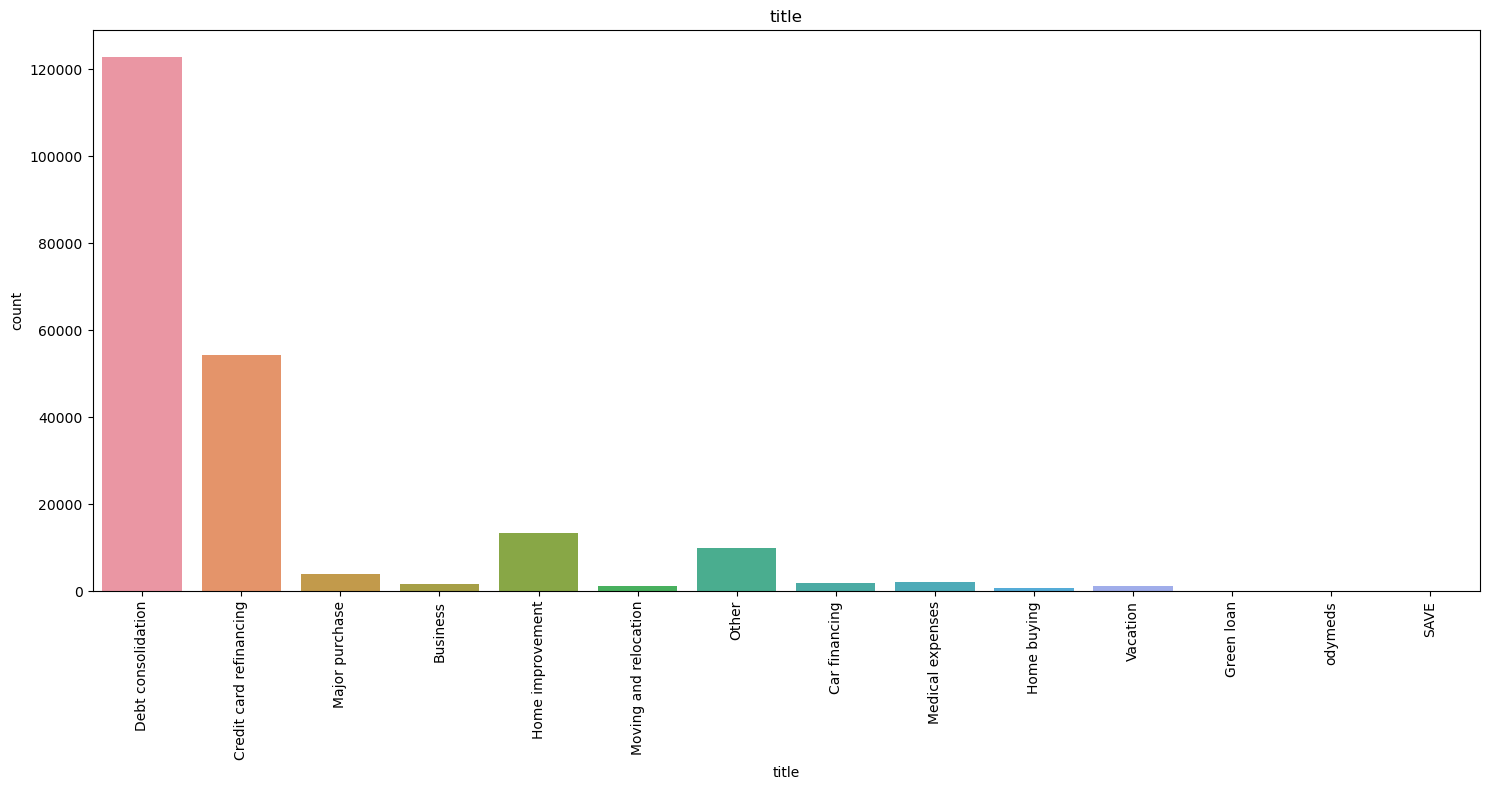

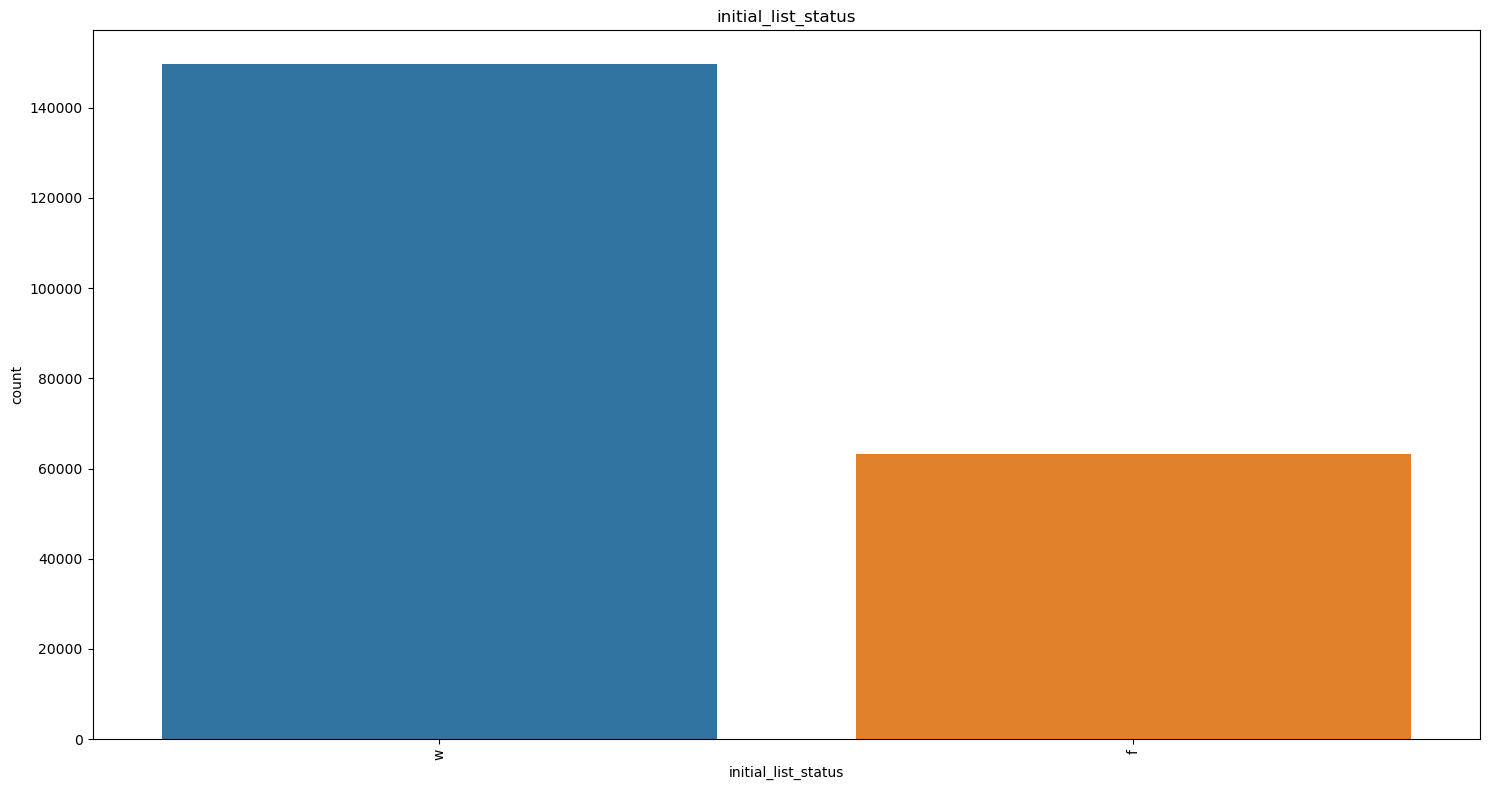

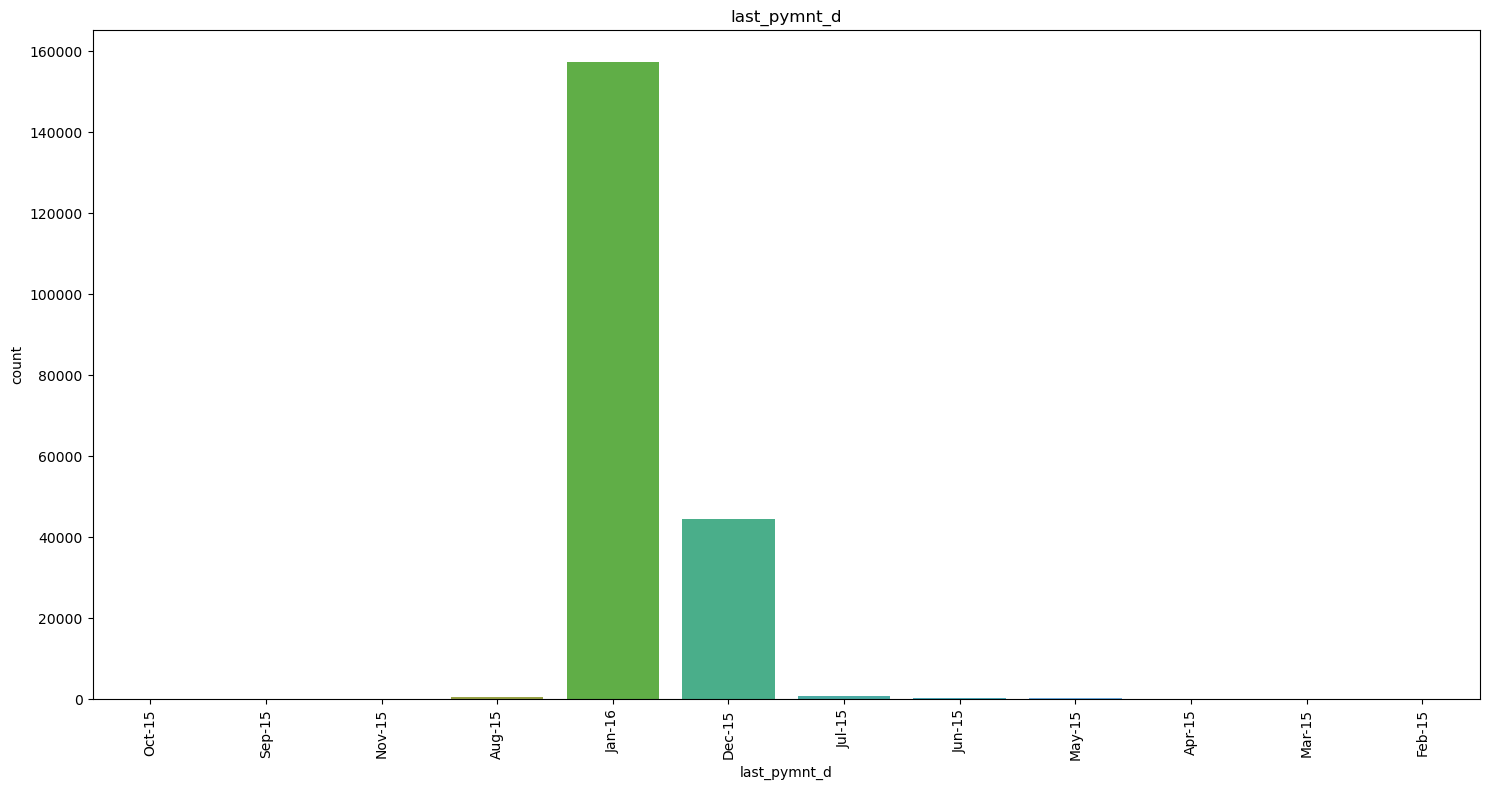

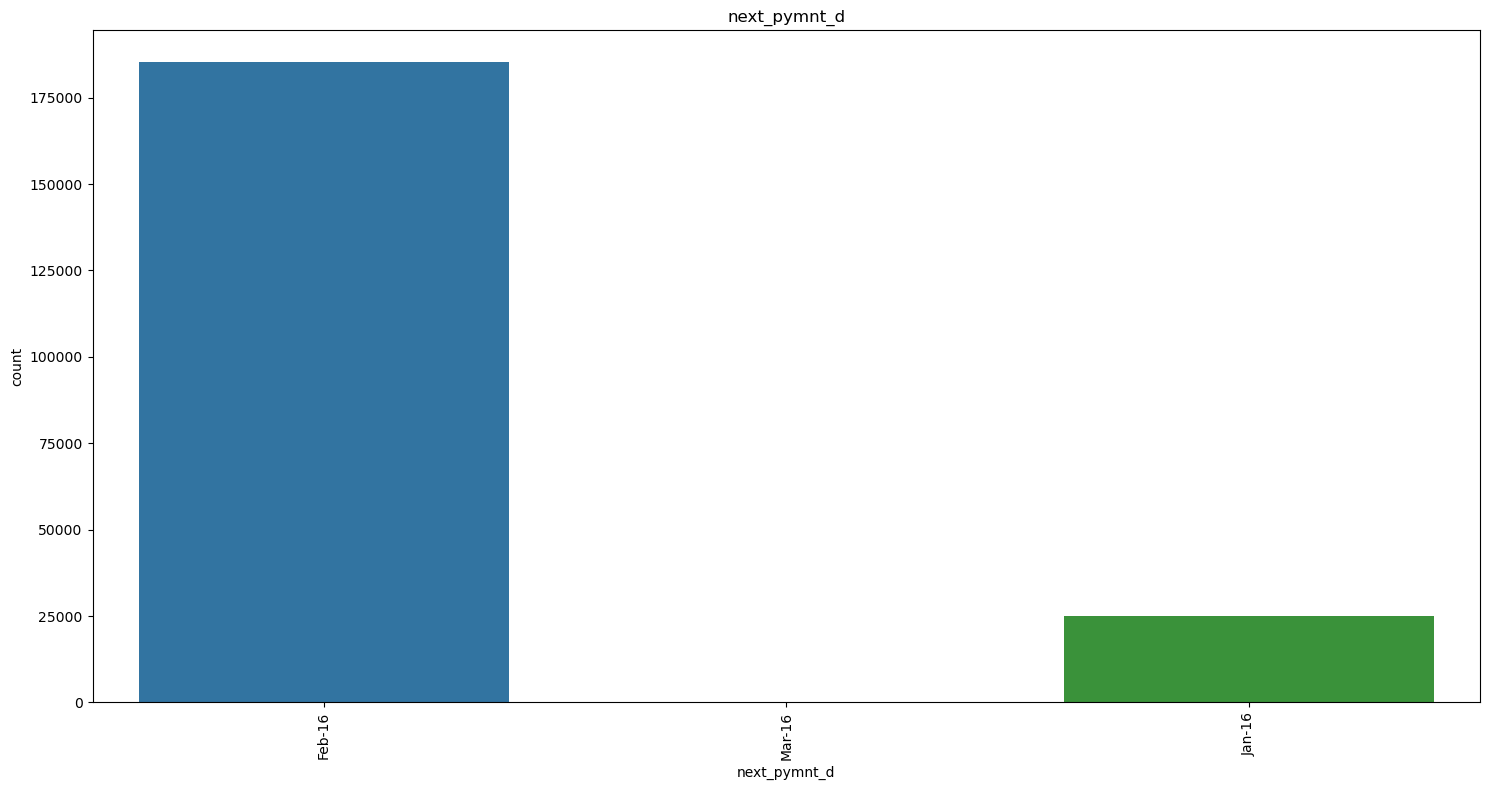

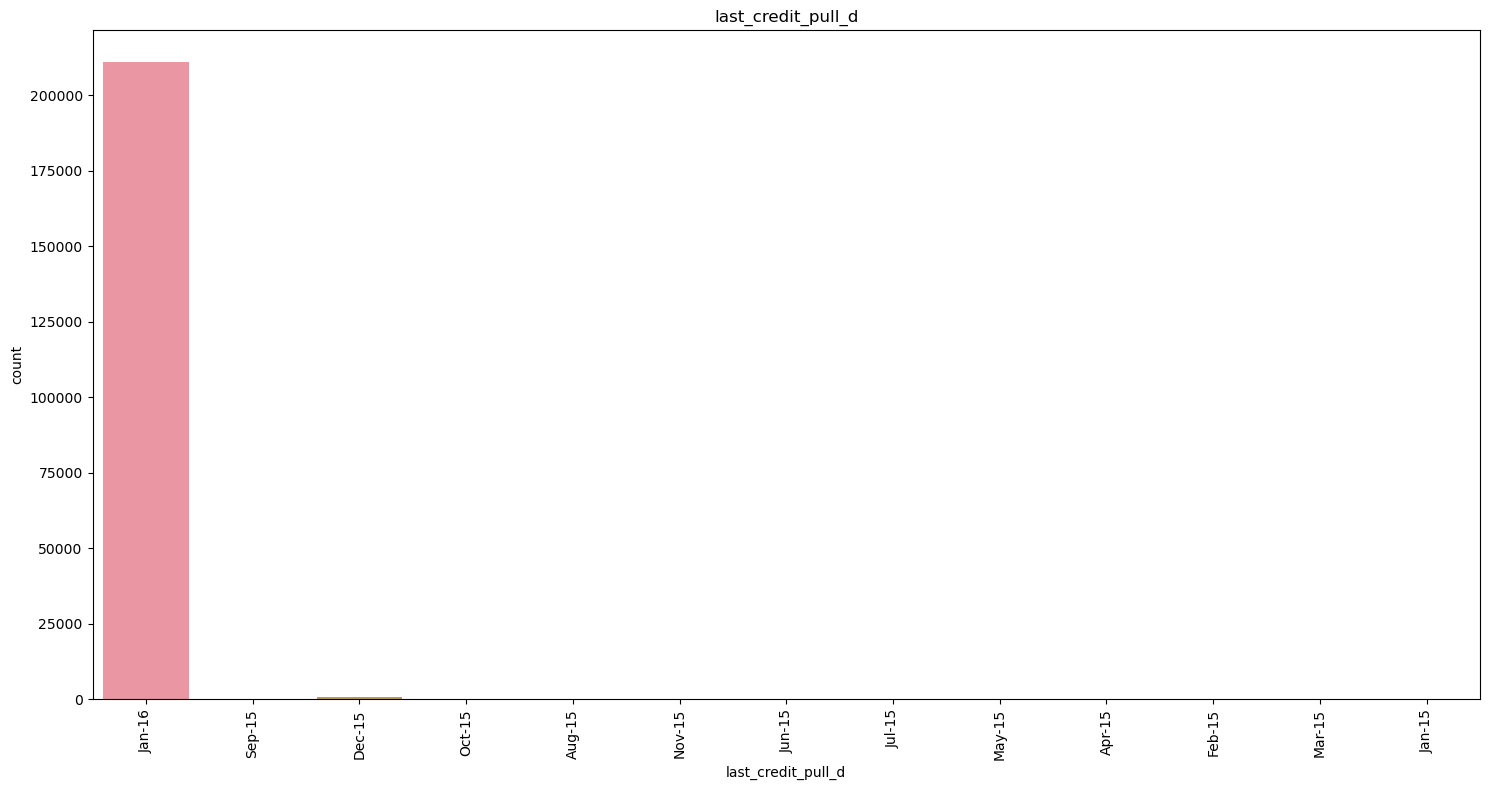

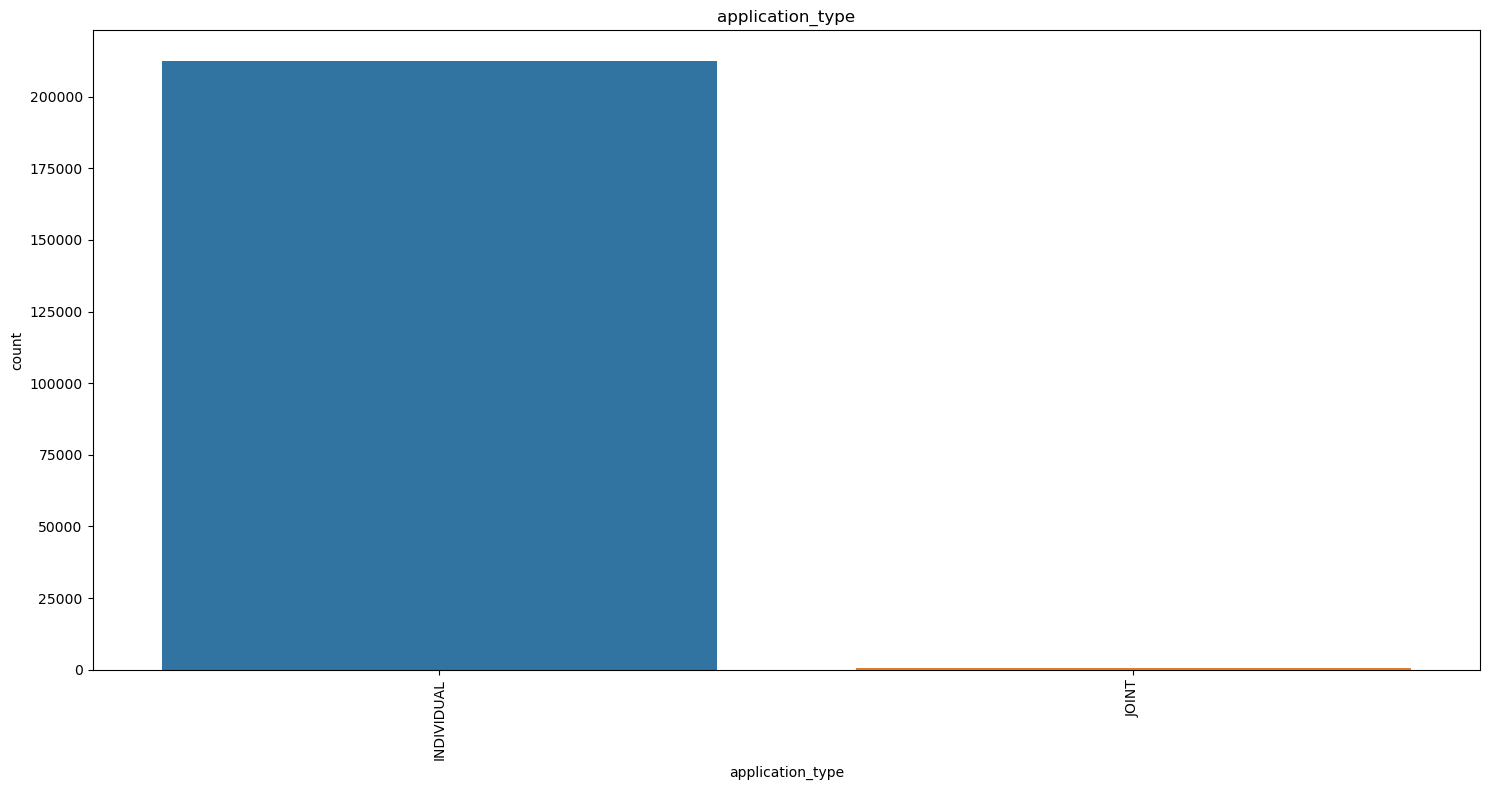

In [44]:
# Loop through each categorical column in the DataFrame
for i in df.drop(columns=['earliest_cr_line', 'emp_title']).select_dtypes(include=object):
    # Create a count plot for the current categorical column
    sns.countplot(data=df, x=i)  # Specify the DataFrame and column name
    plt.title(i)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()       # Ensure proper spacing between plots
    plt.show()               # Display the plot


**Numeric Columns**

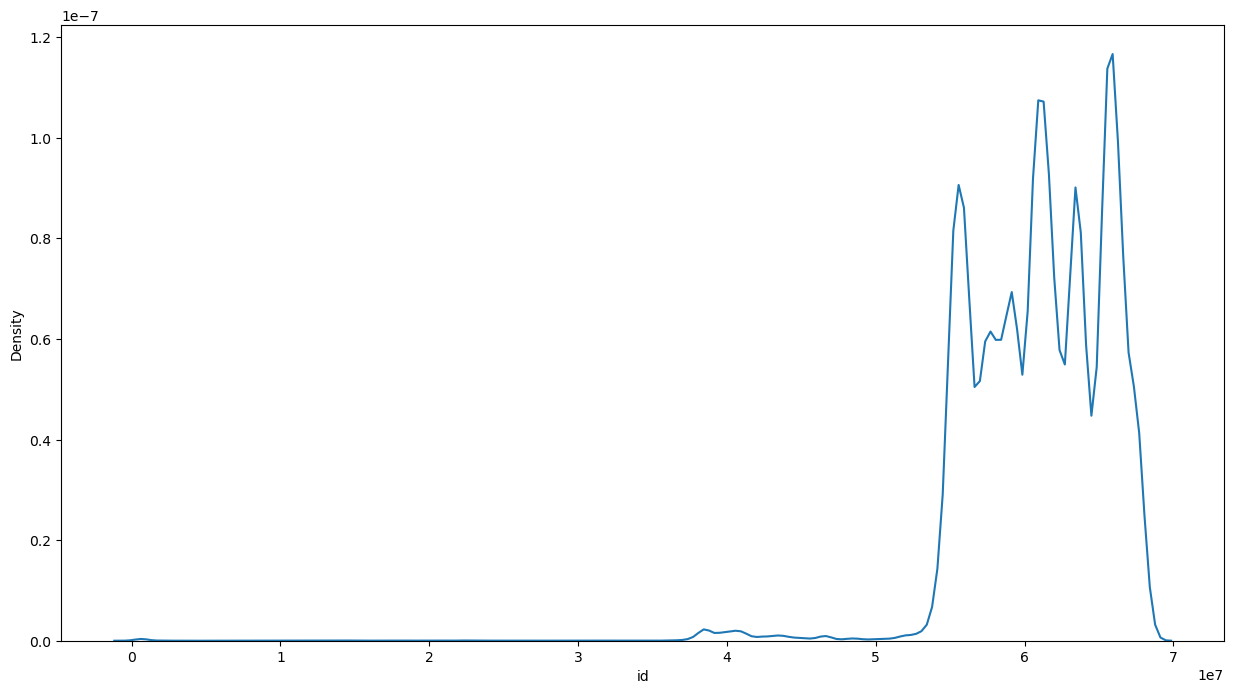

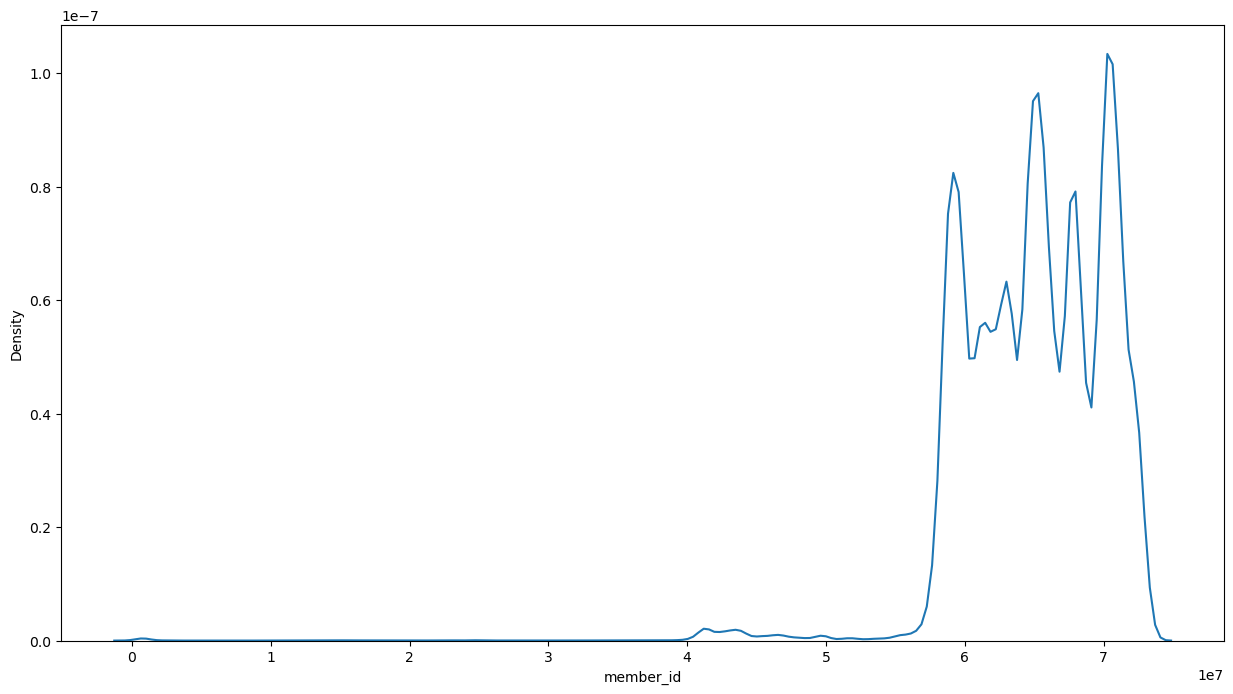

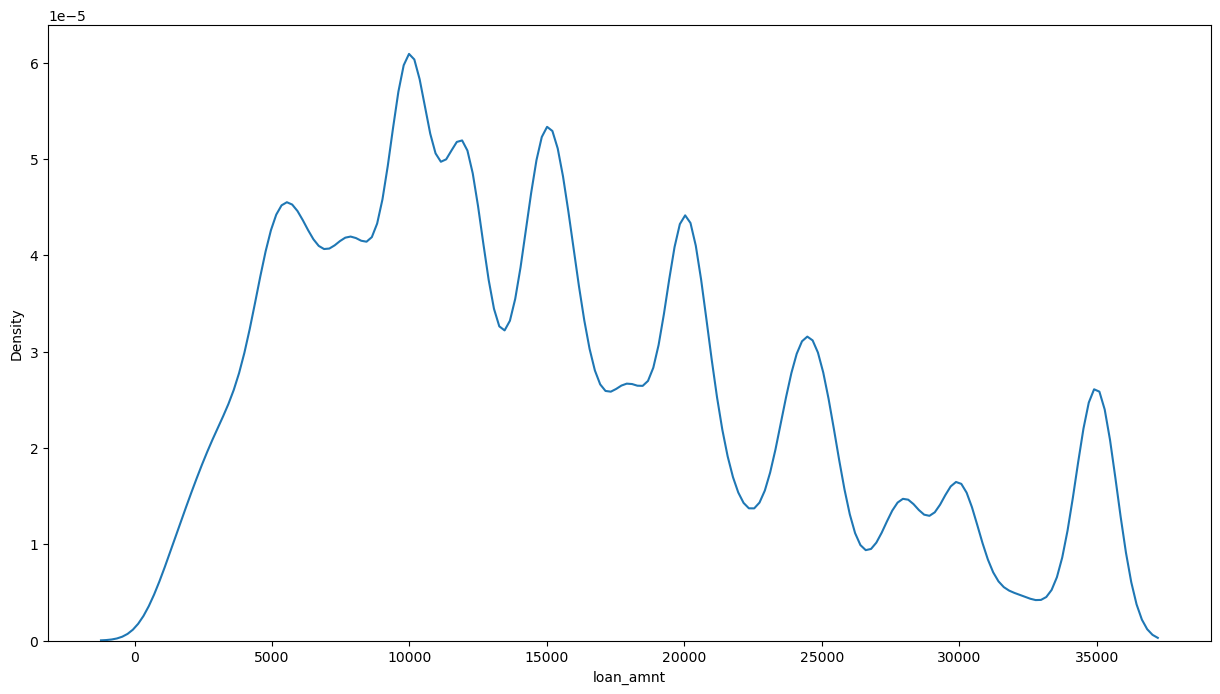

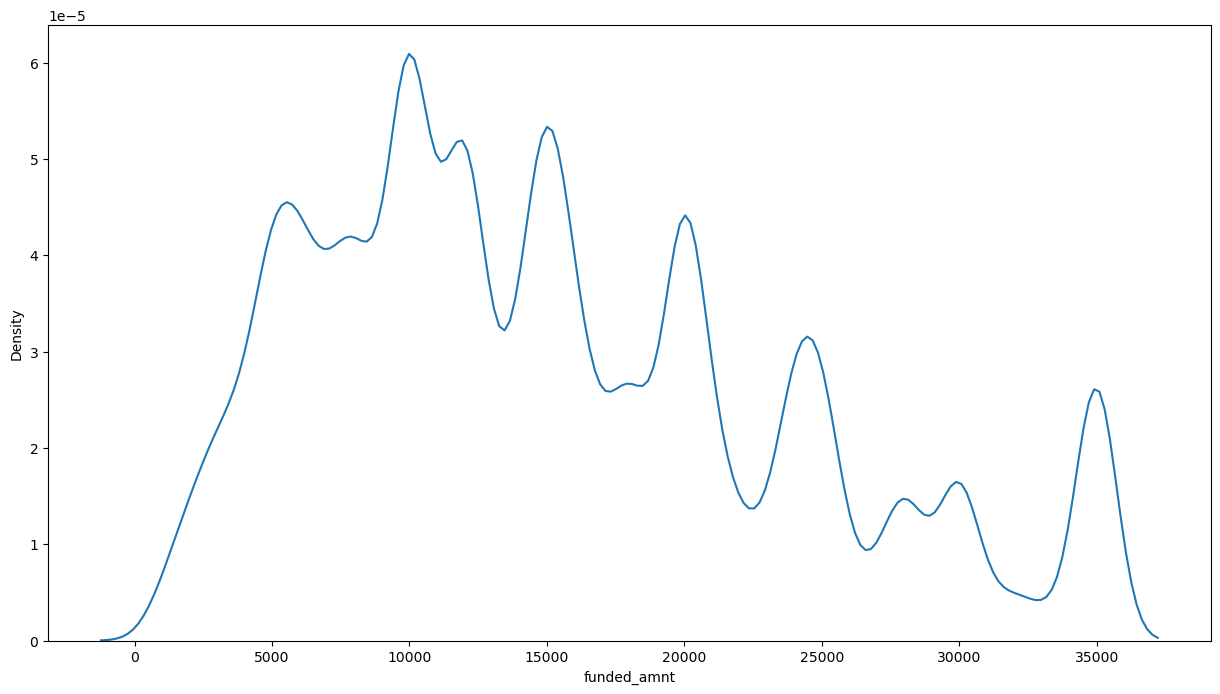

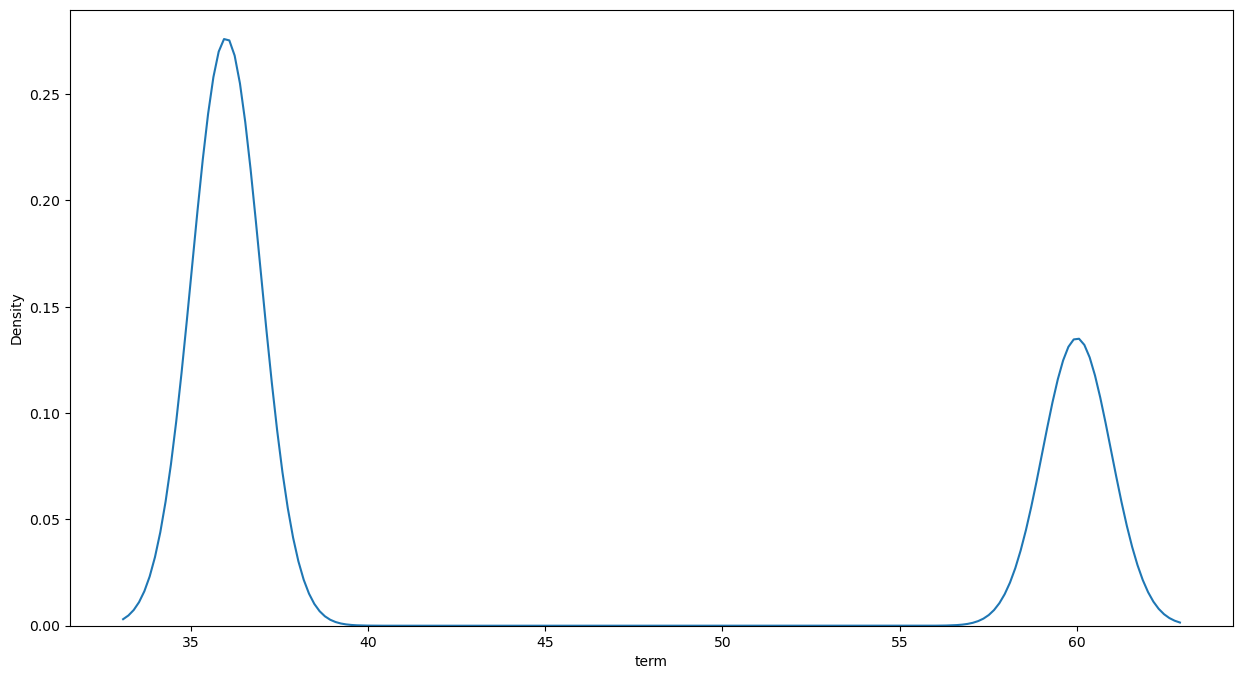

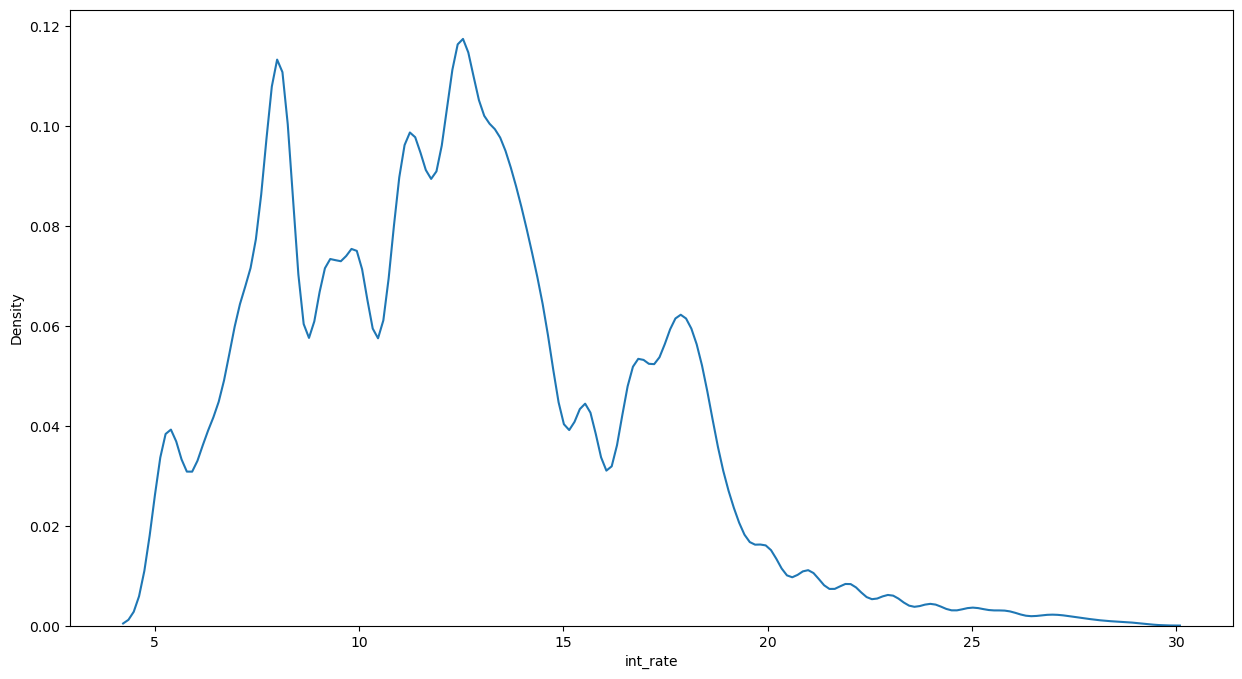

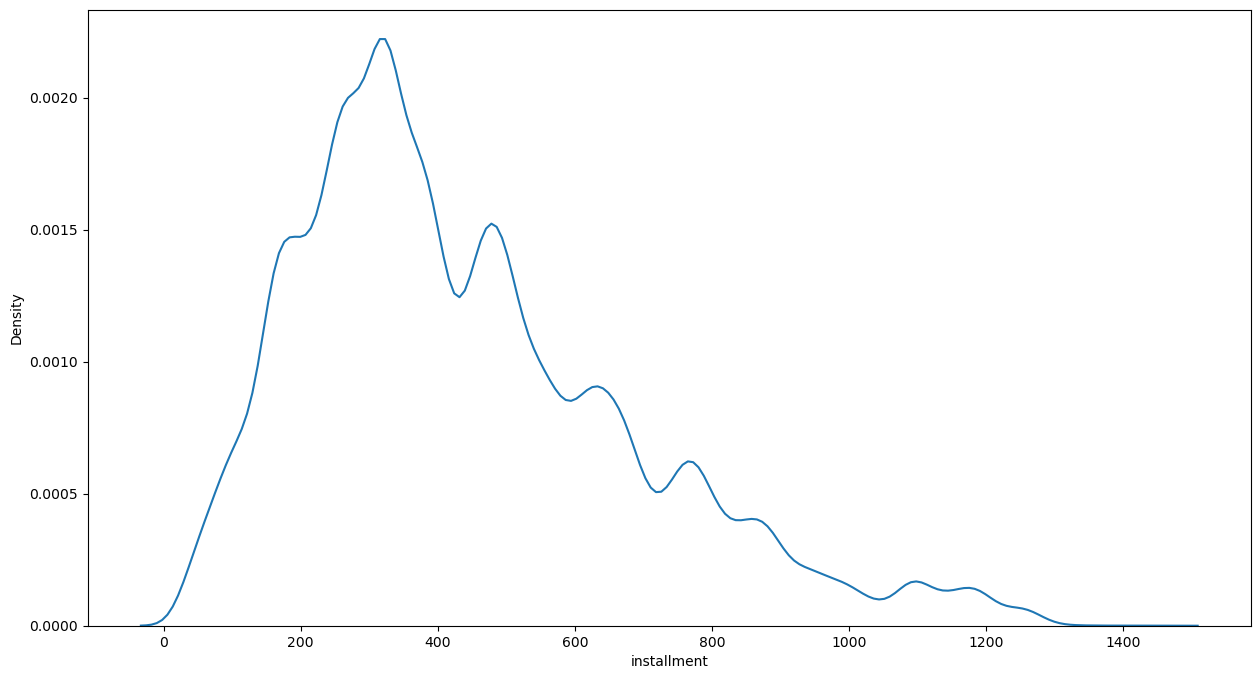

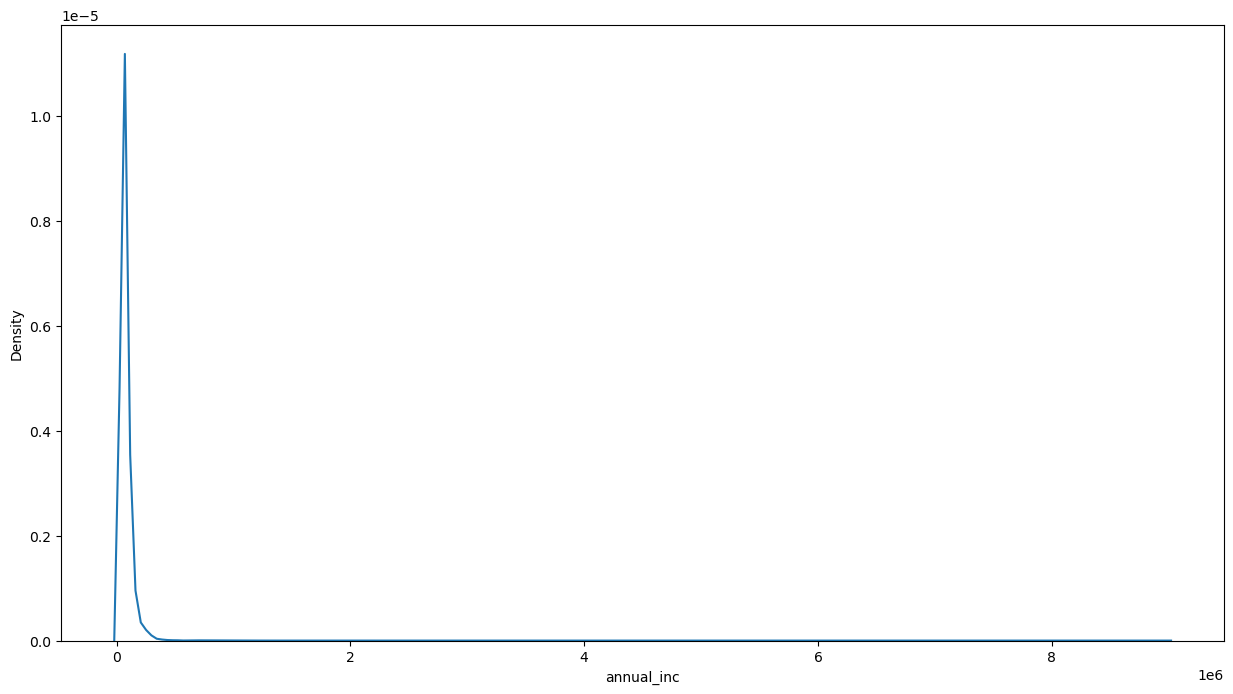

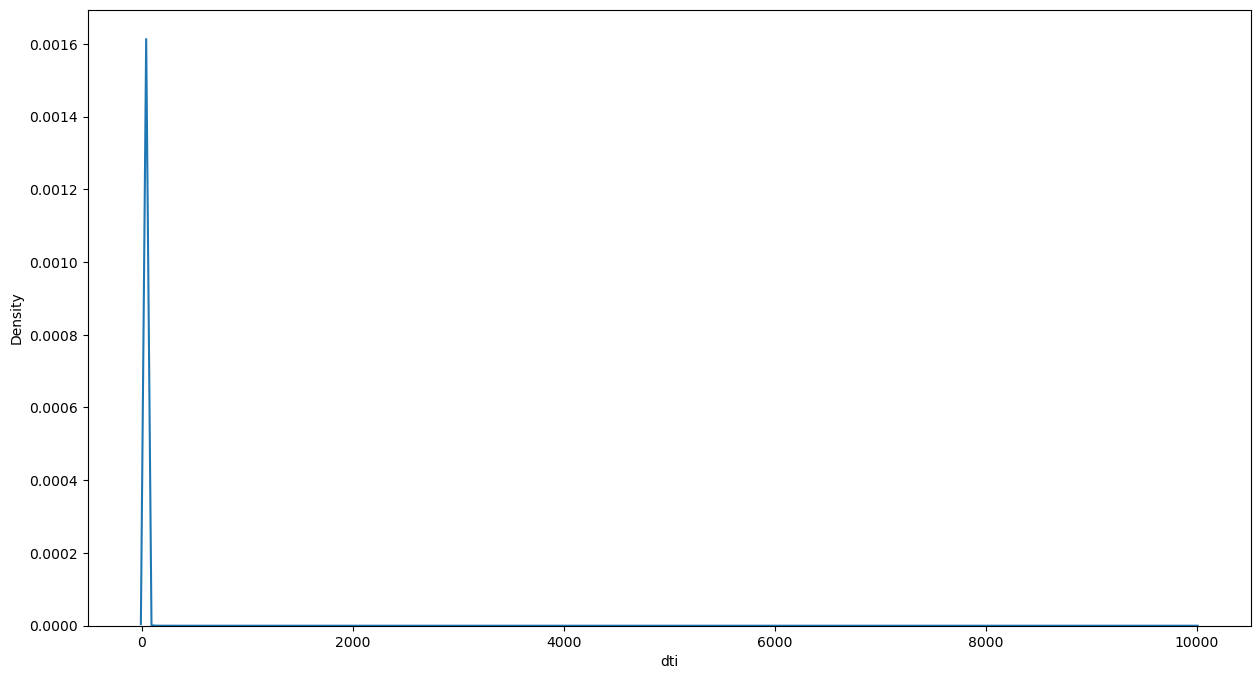

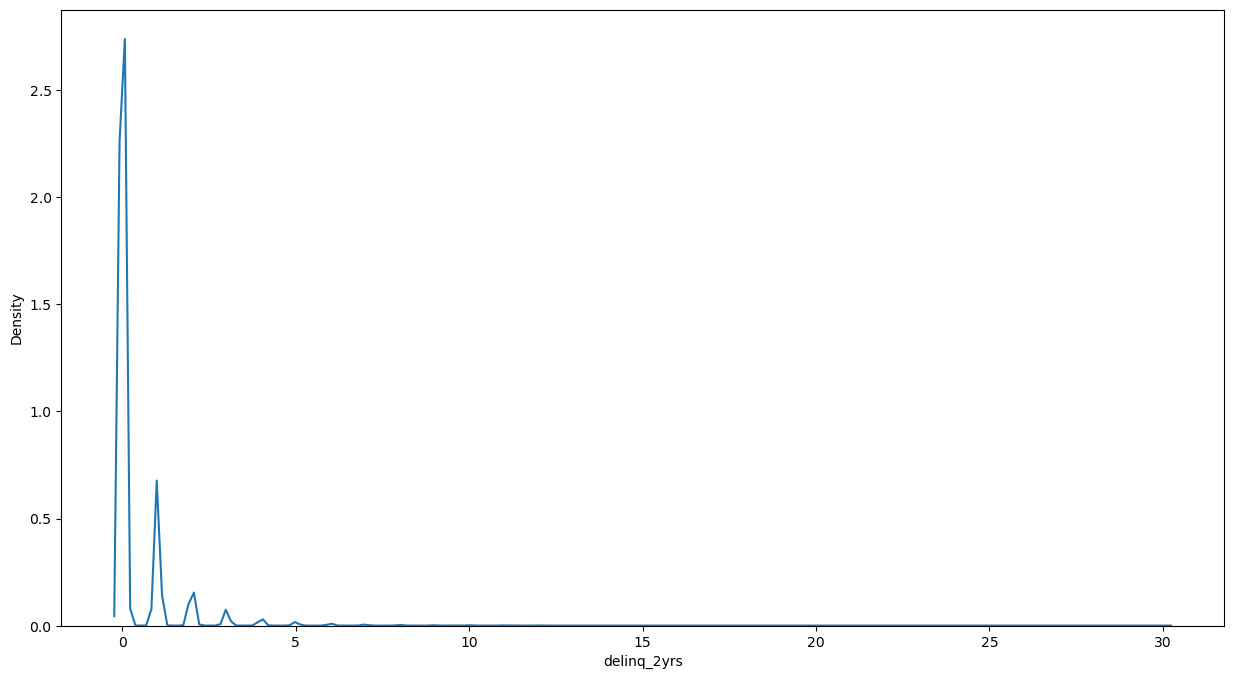

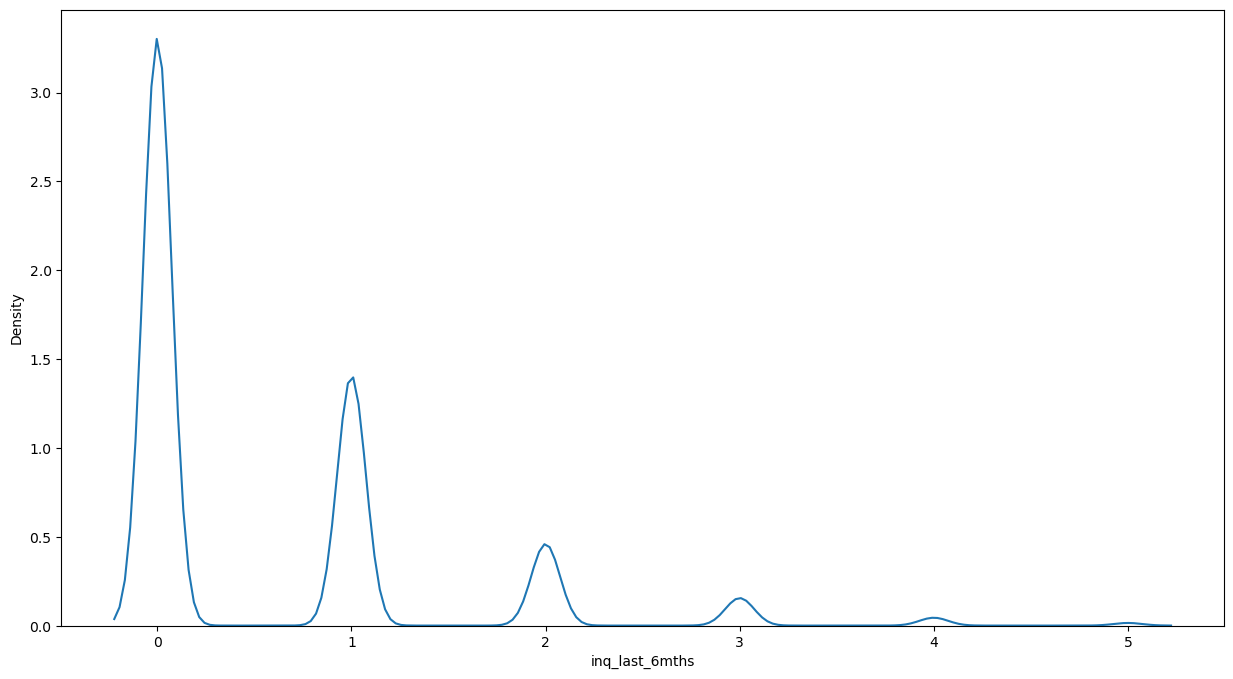

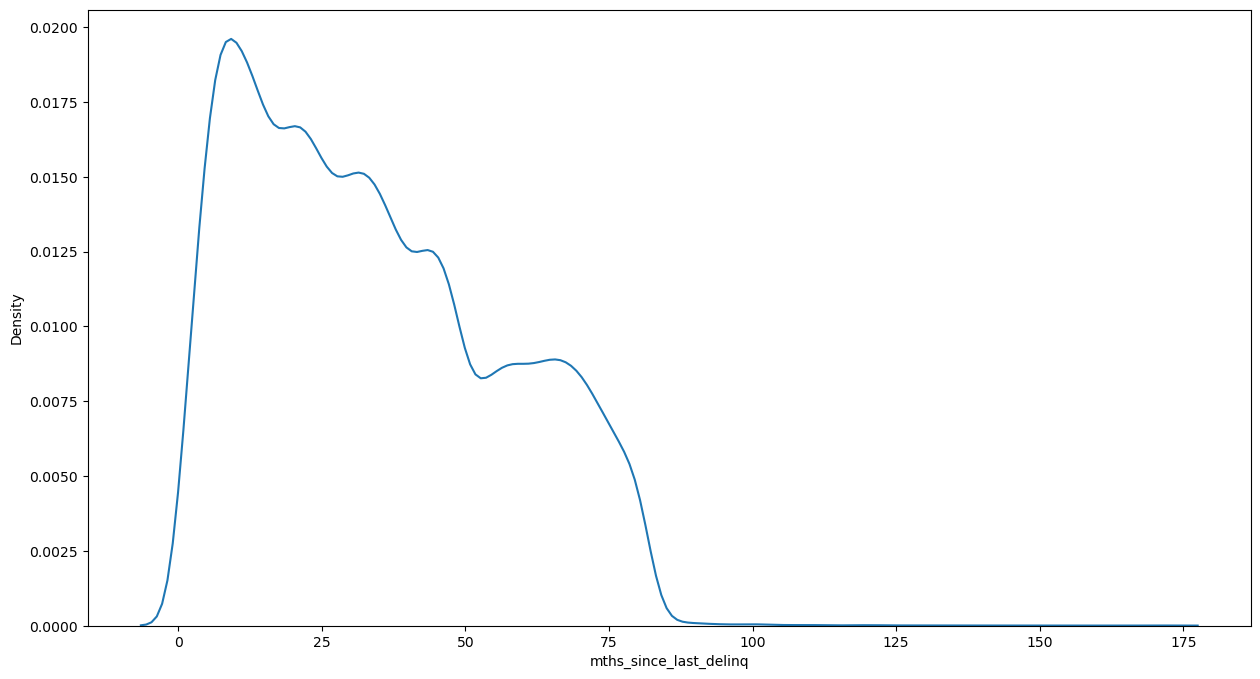

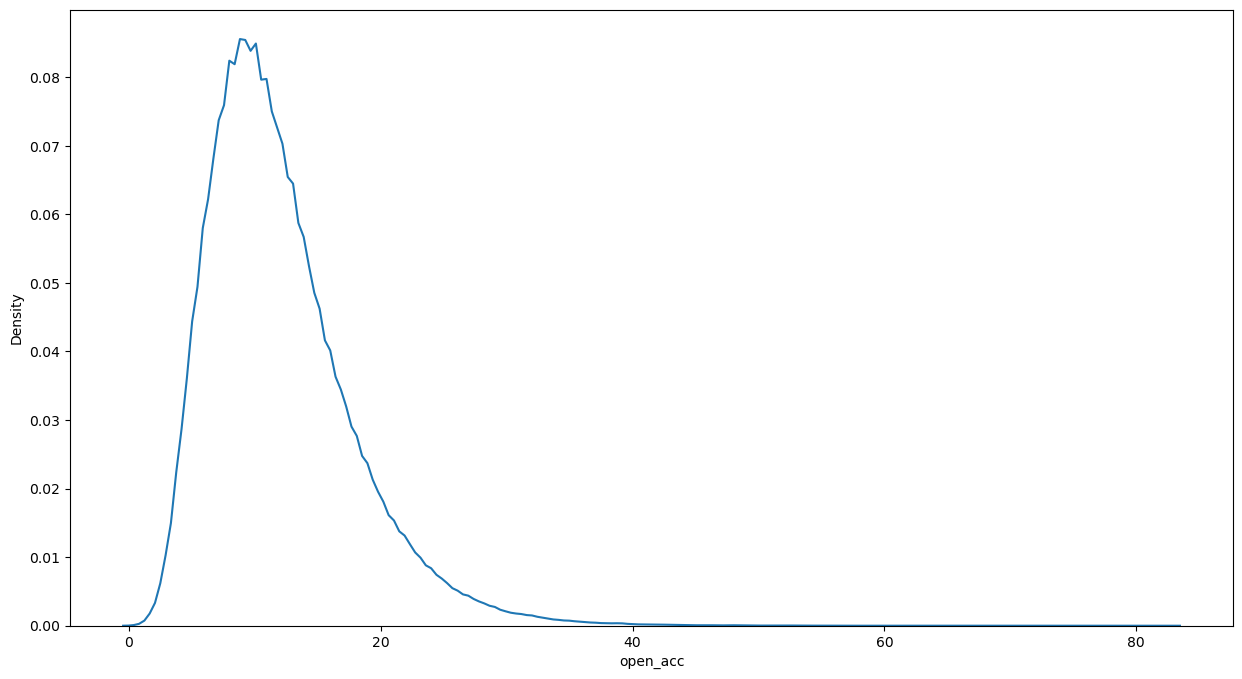

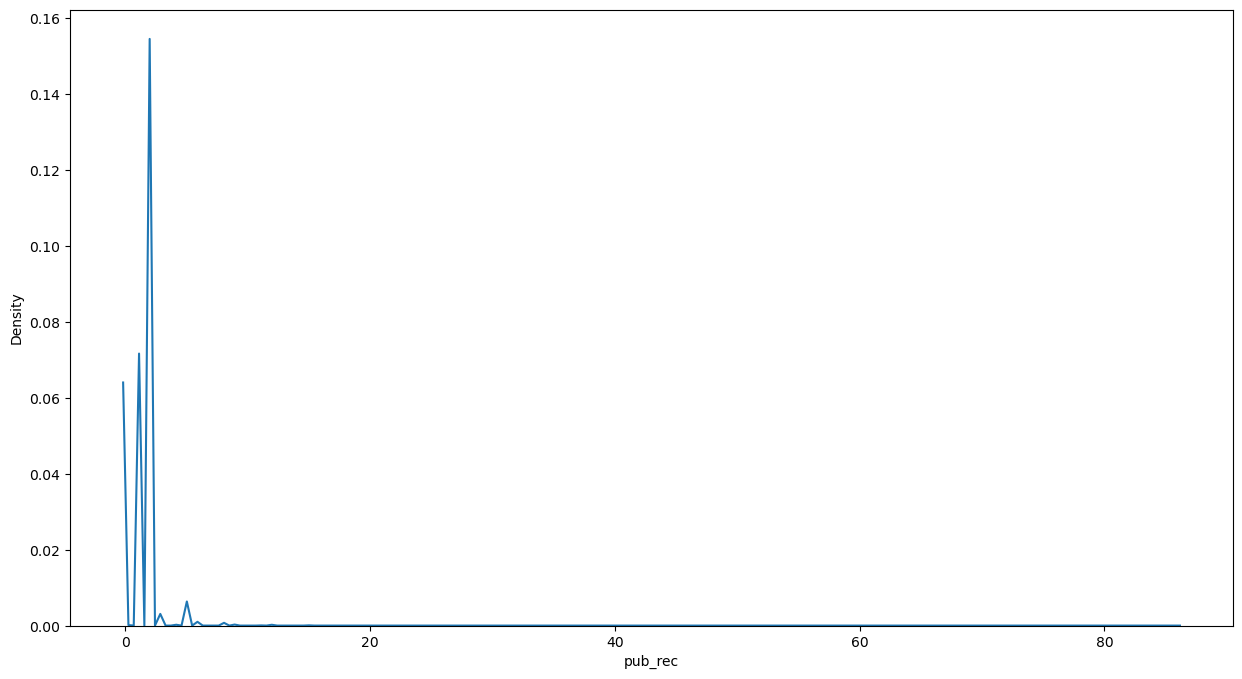

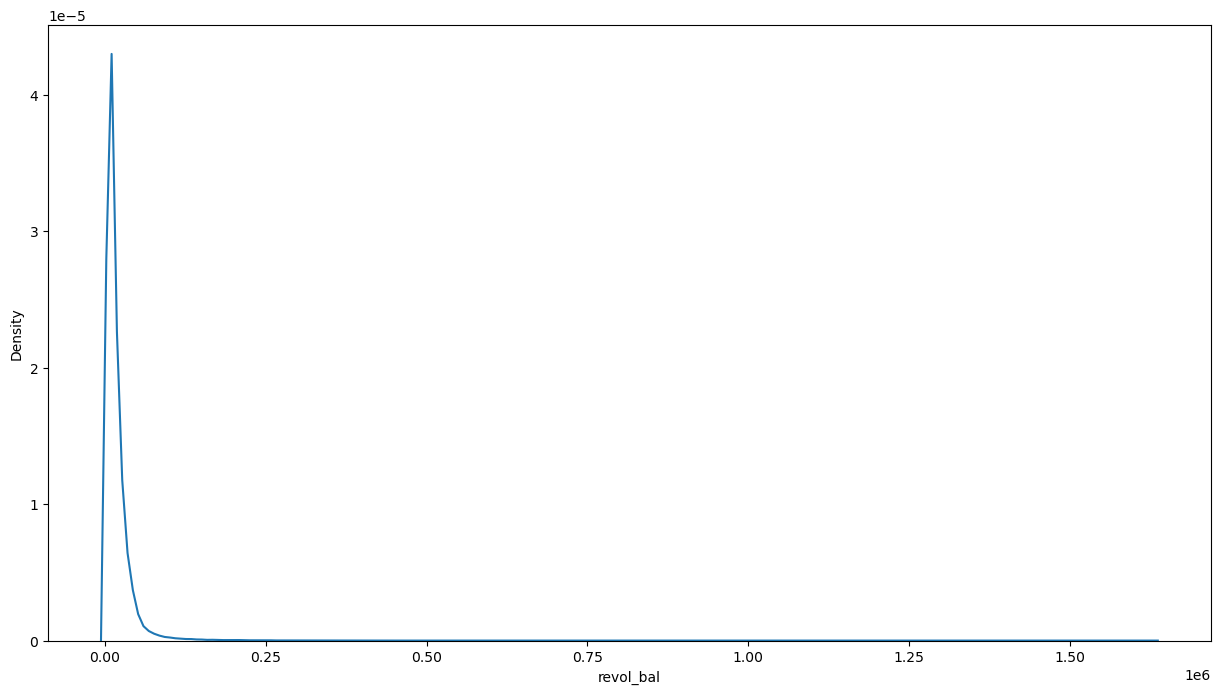

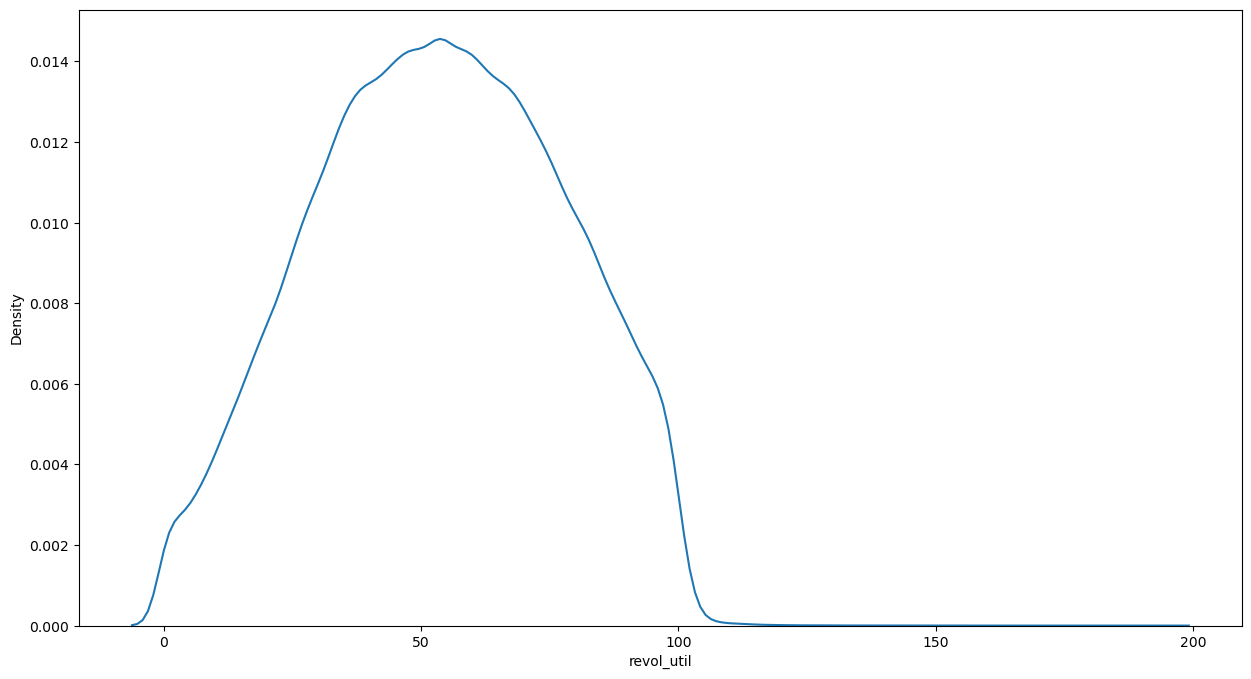

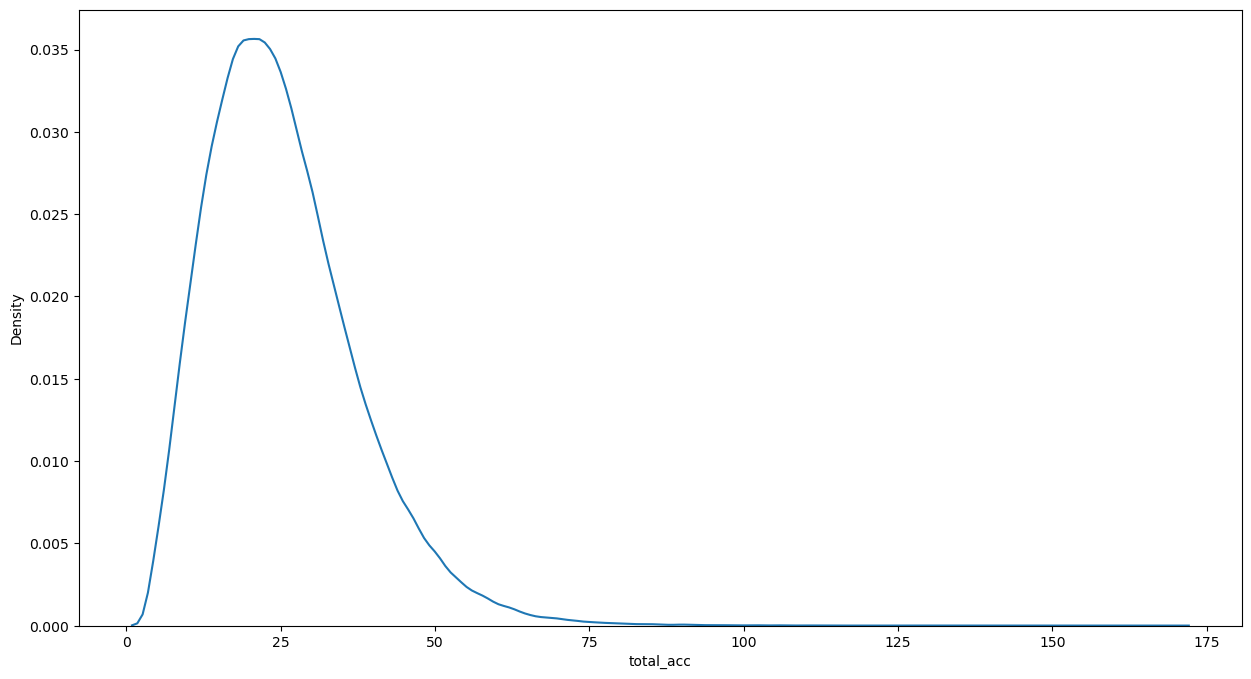

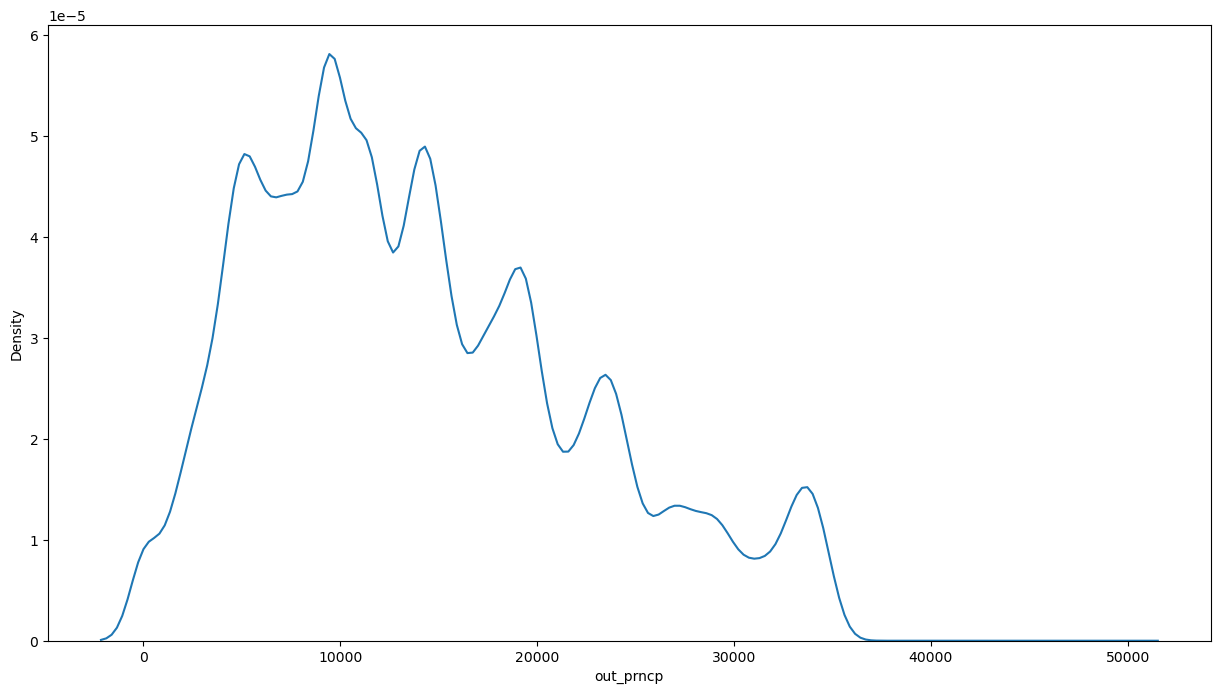

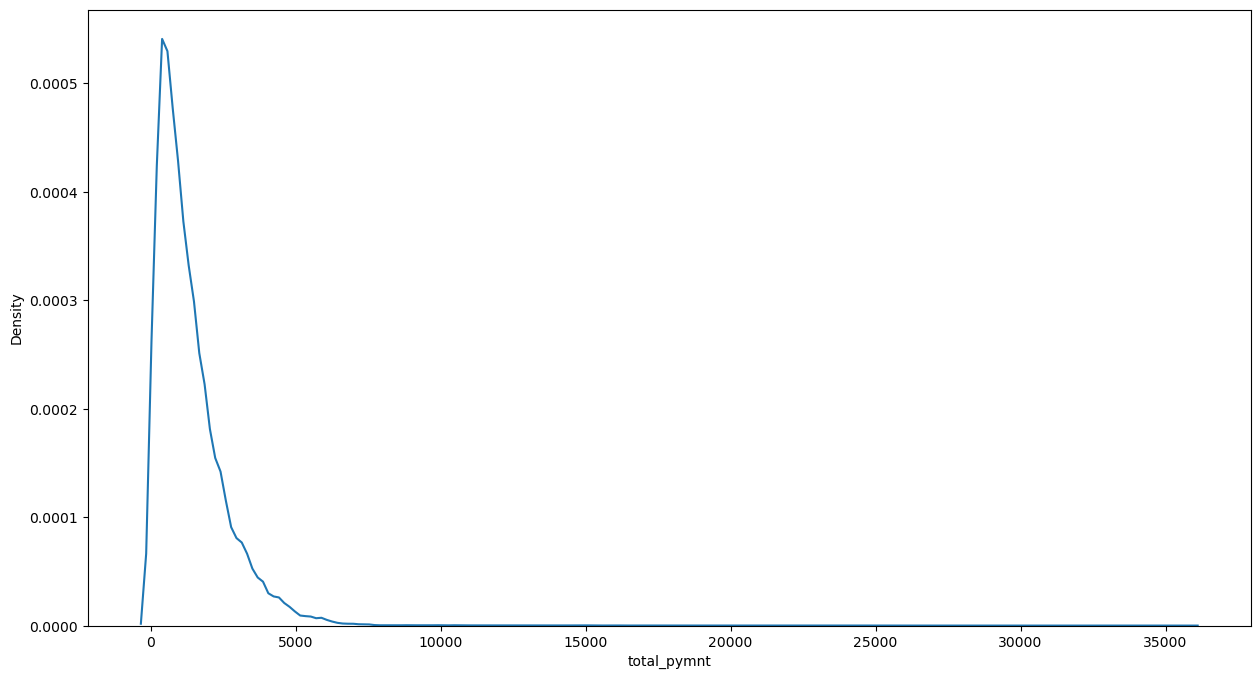

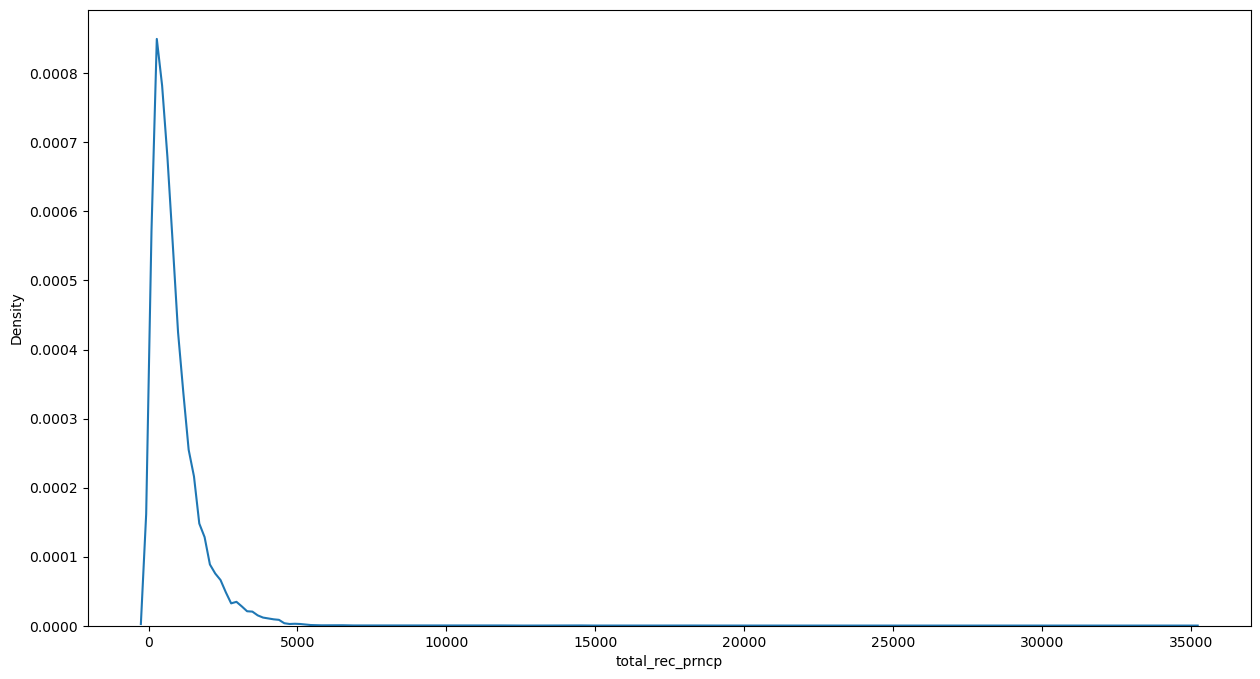

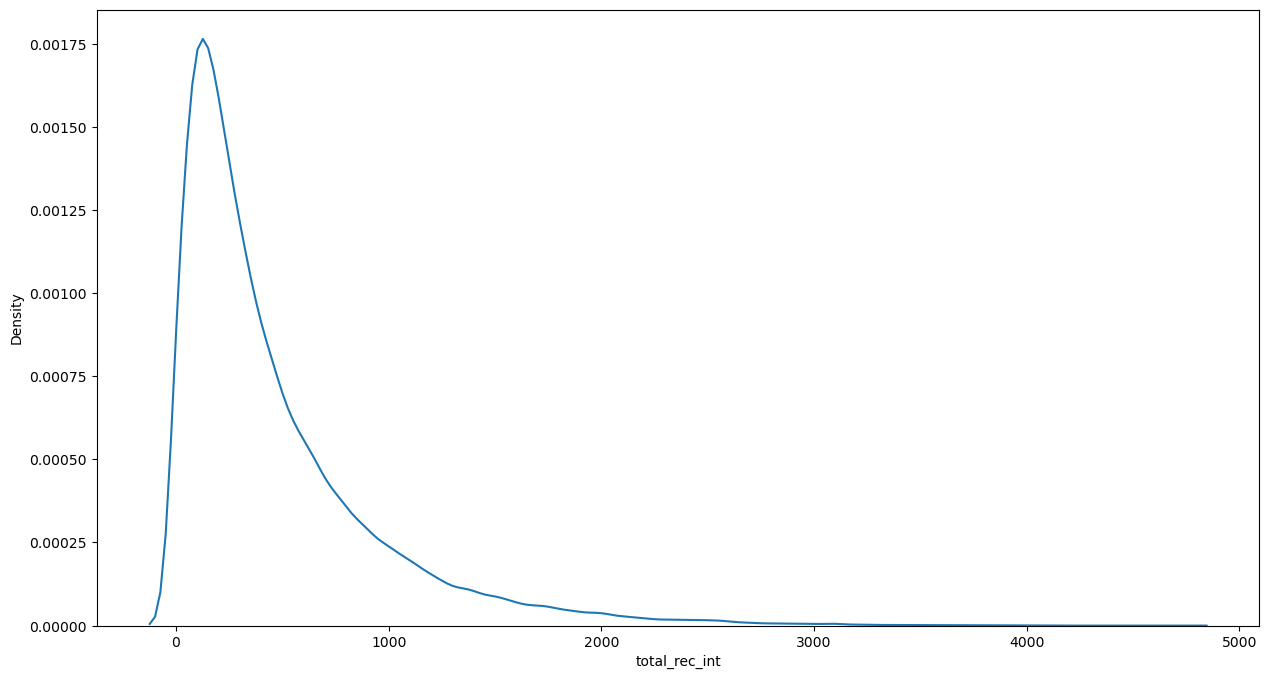

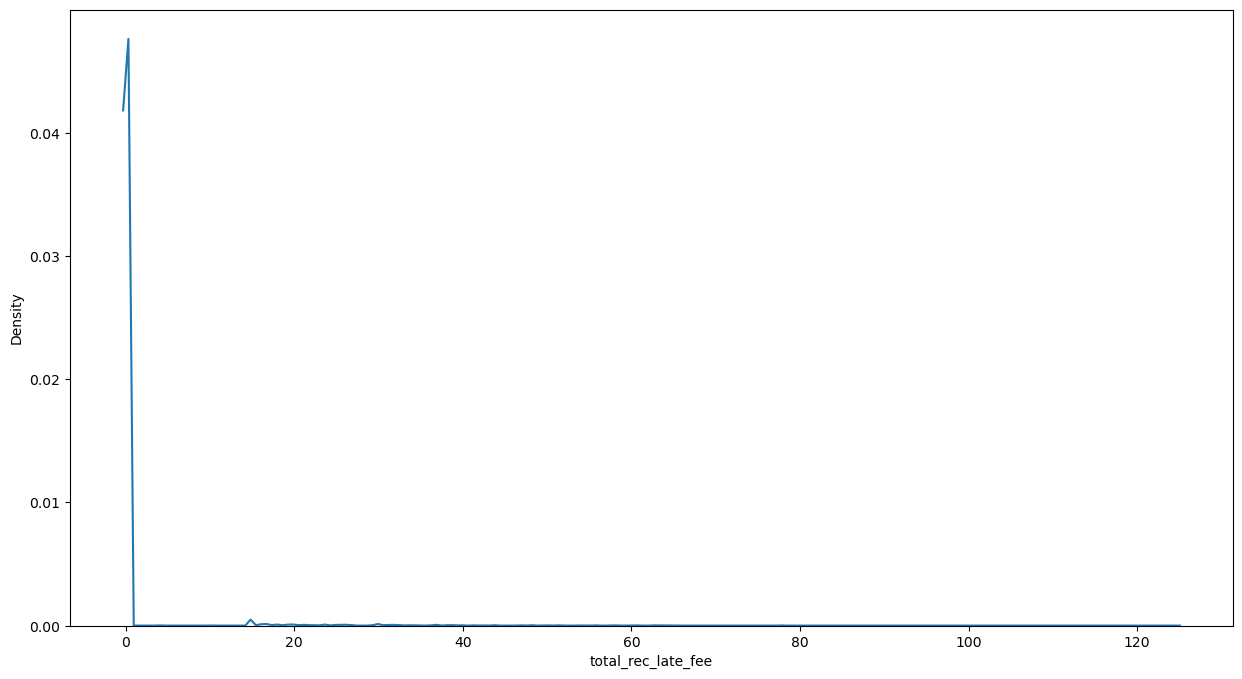

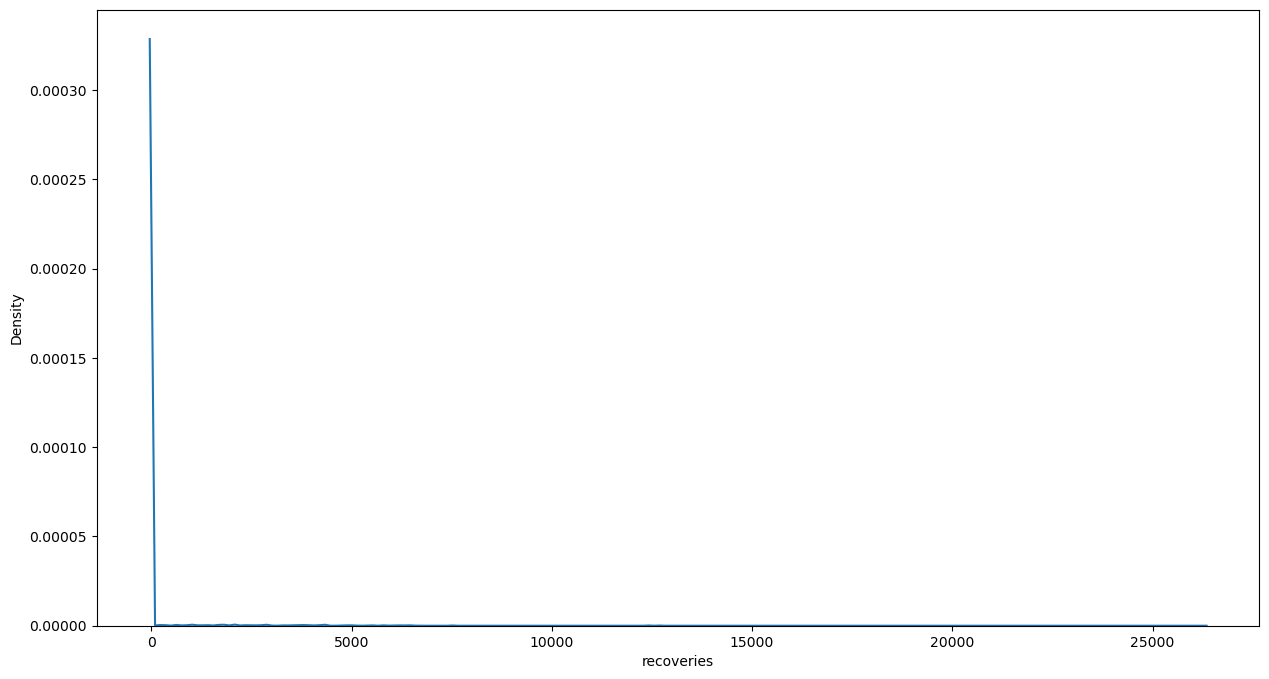

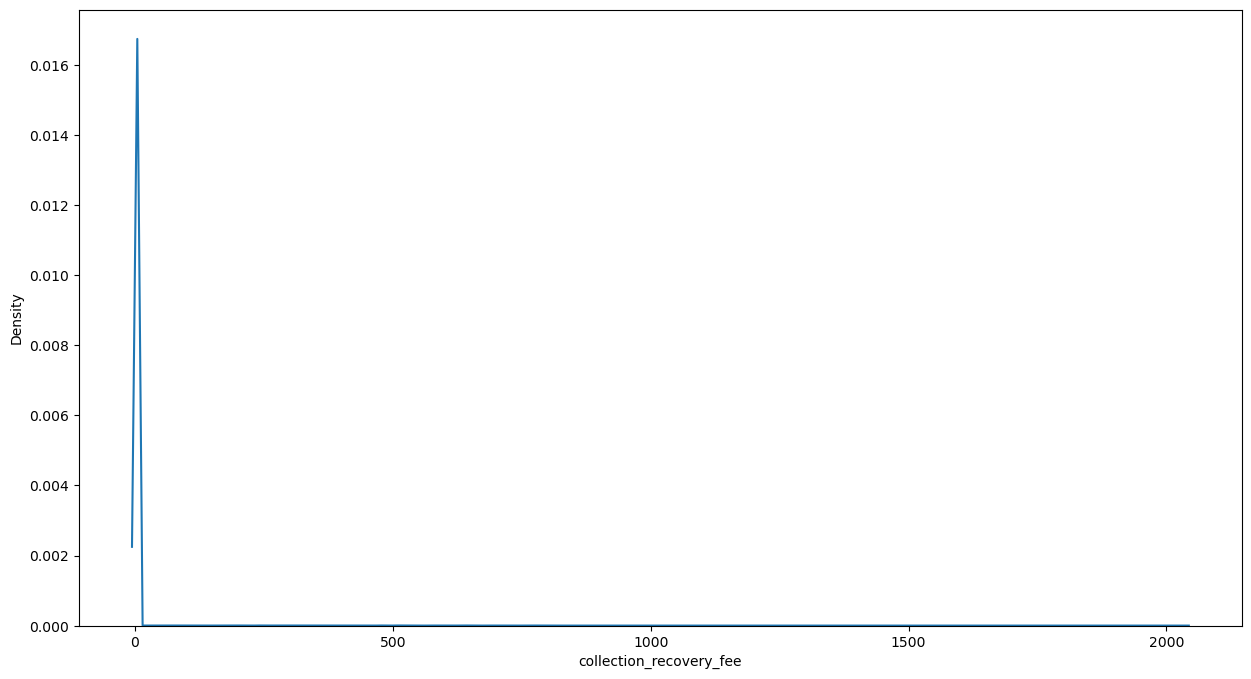

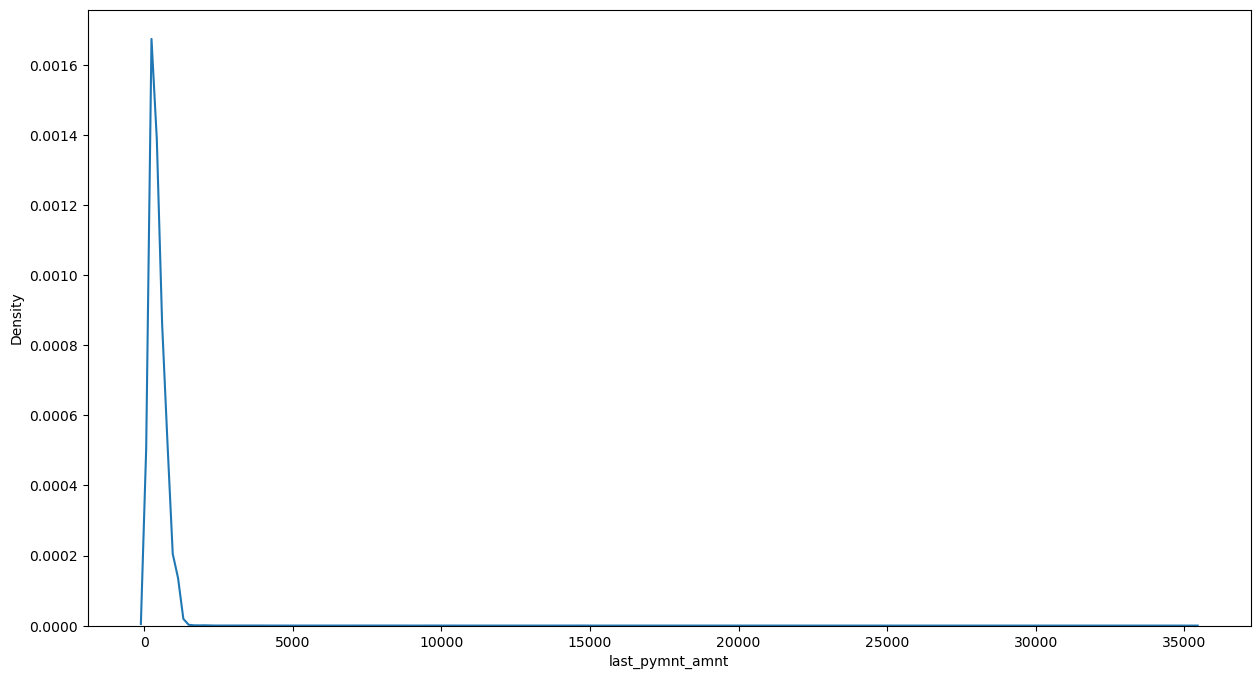

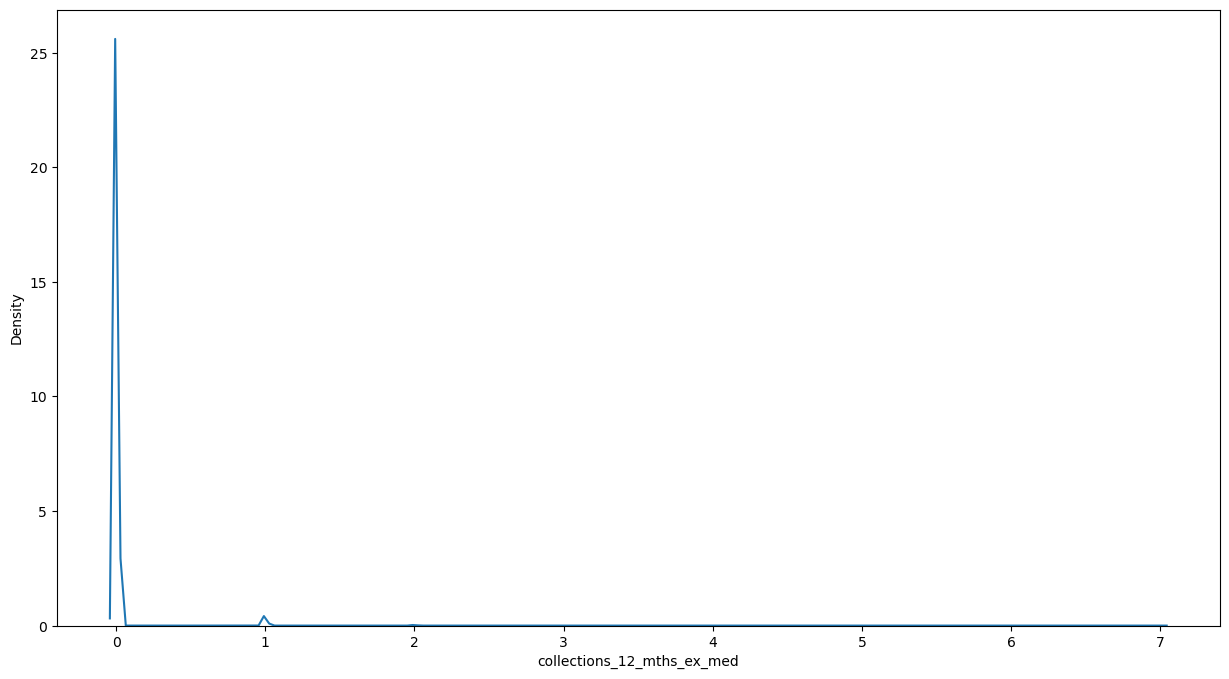

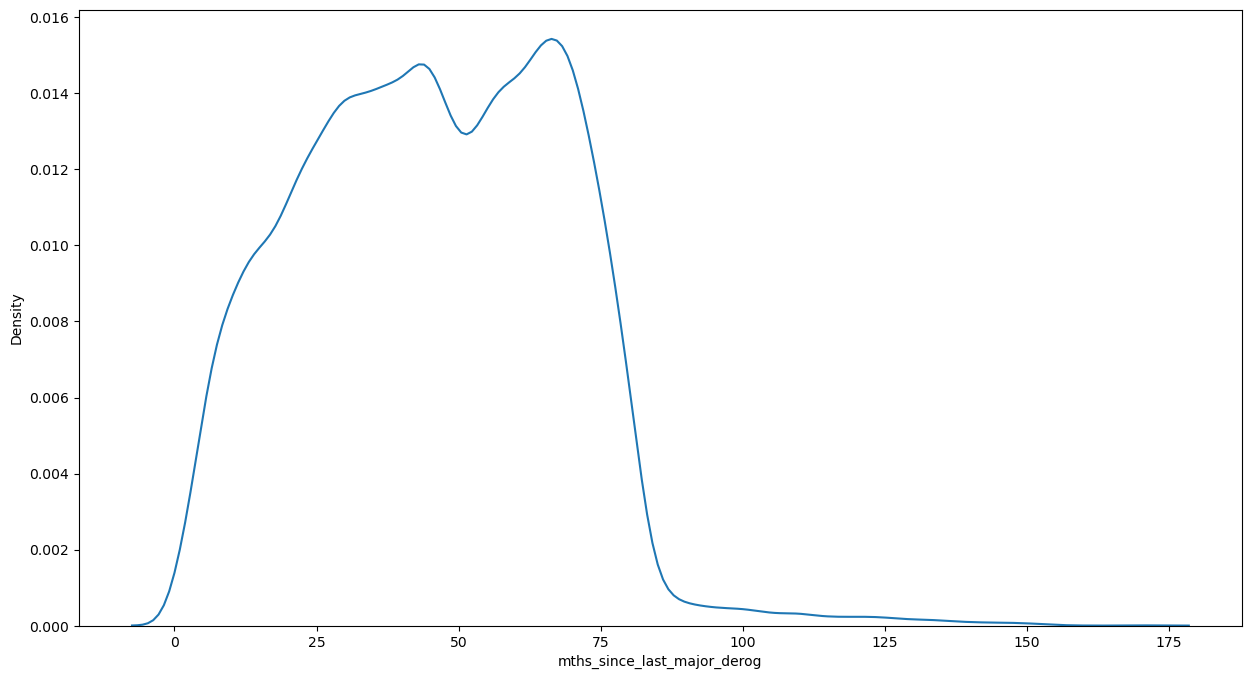

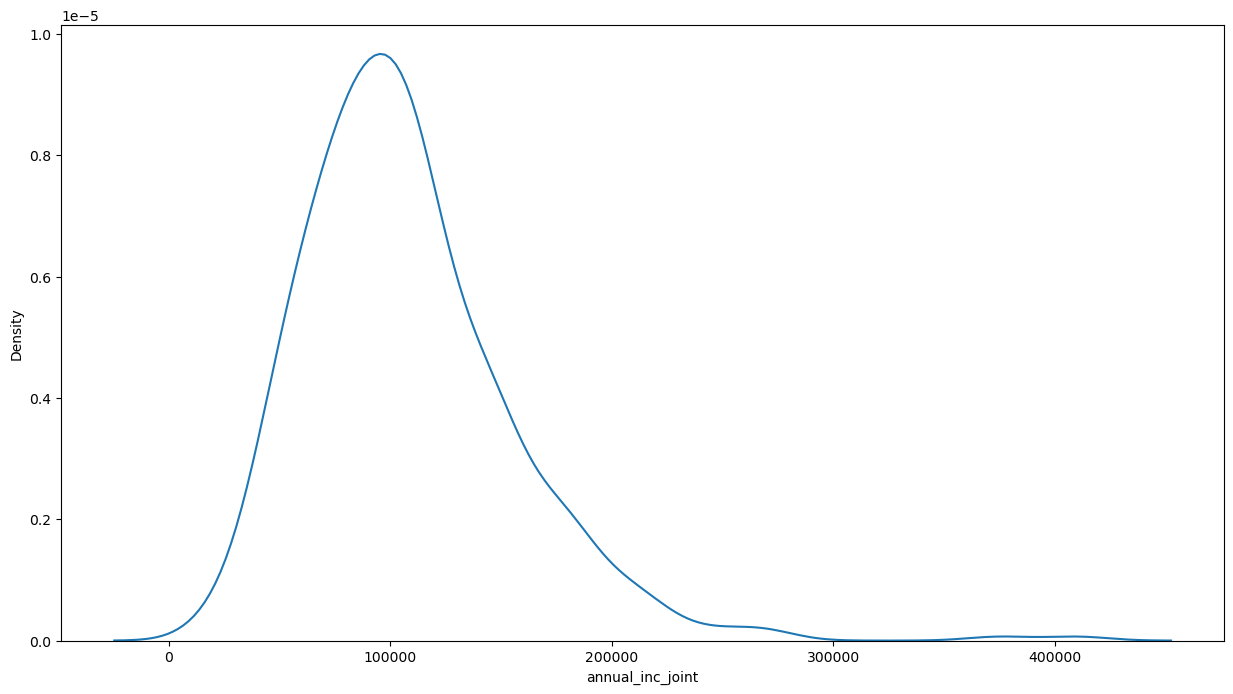

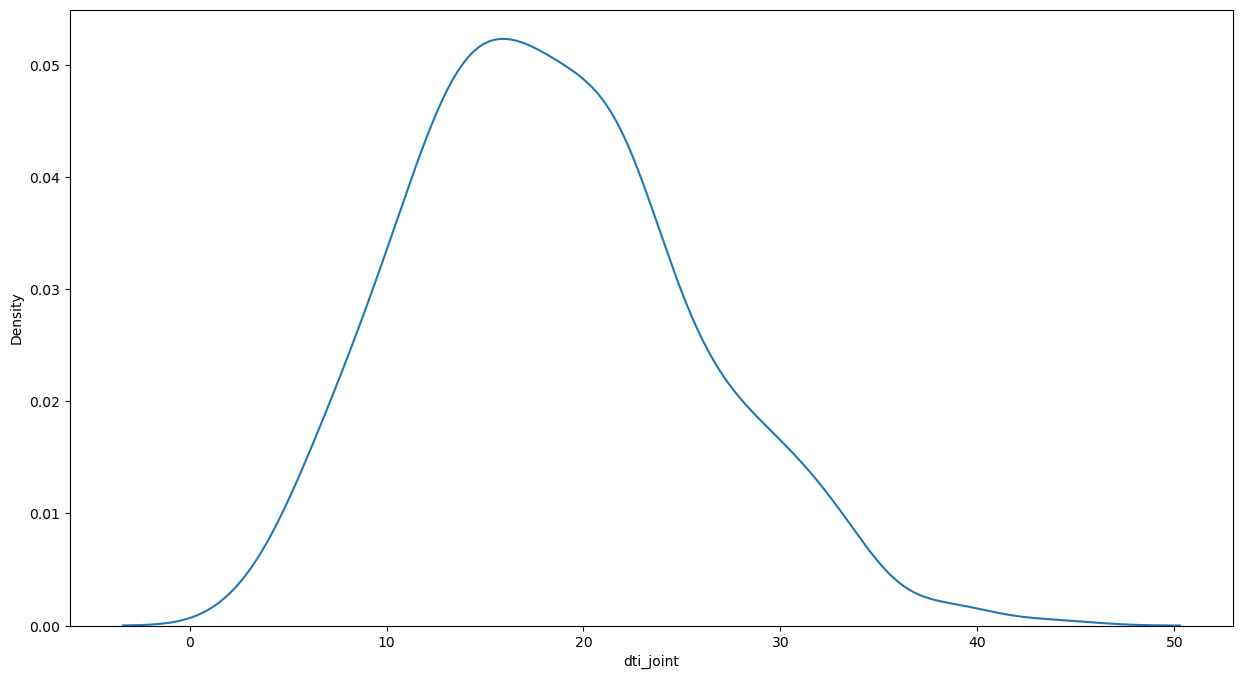

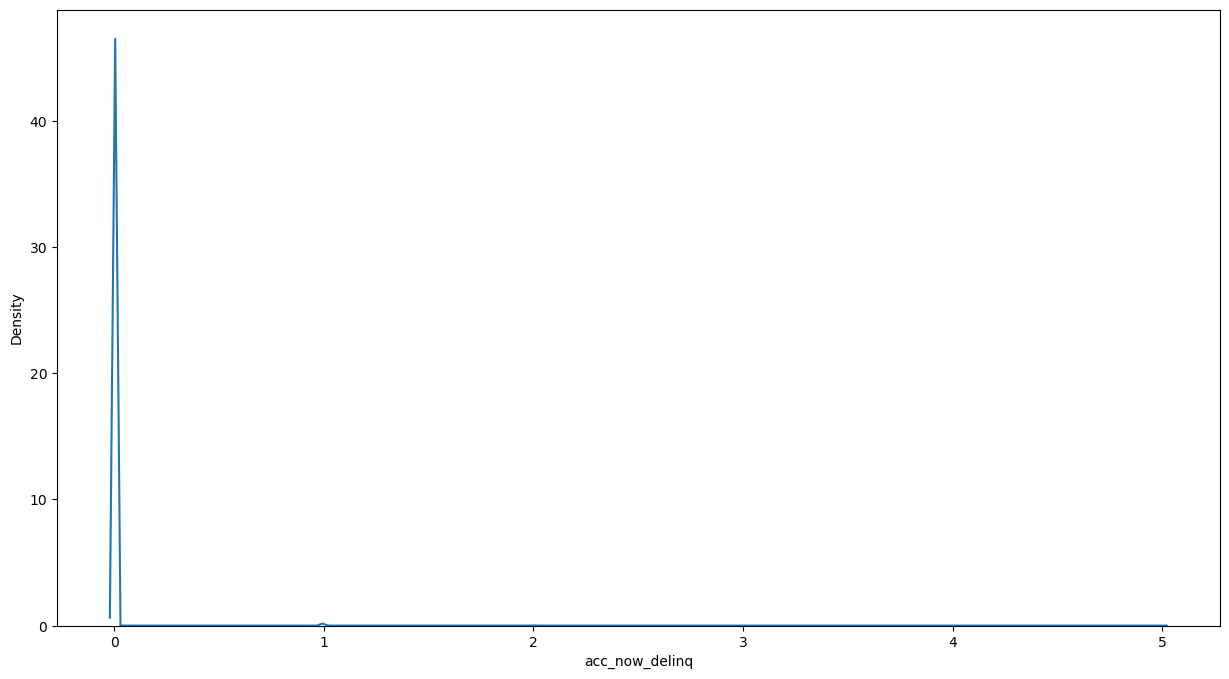

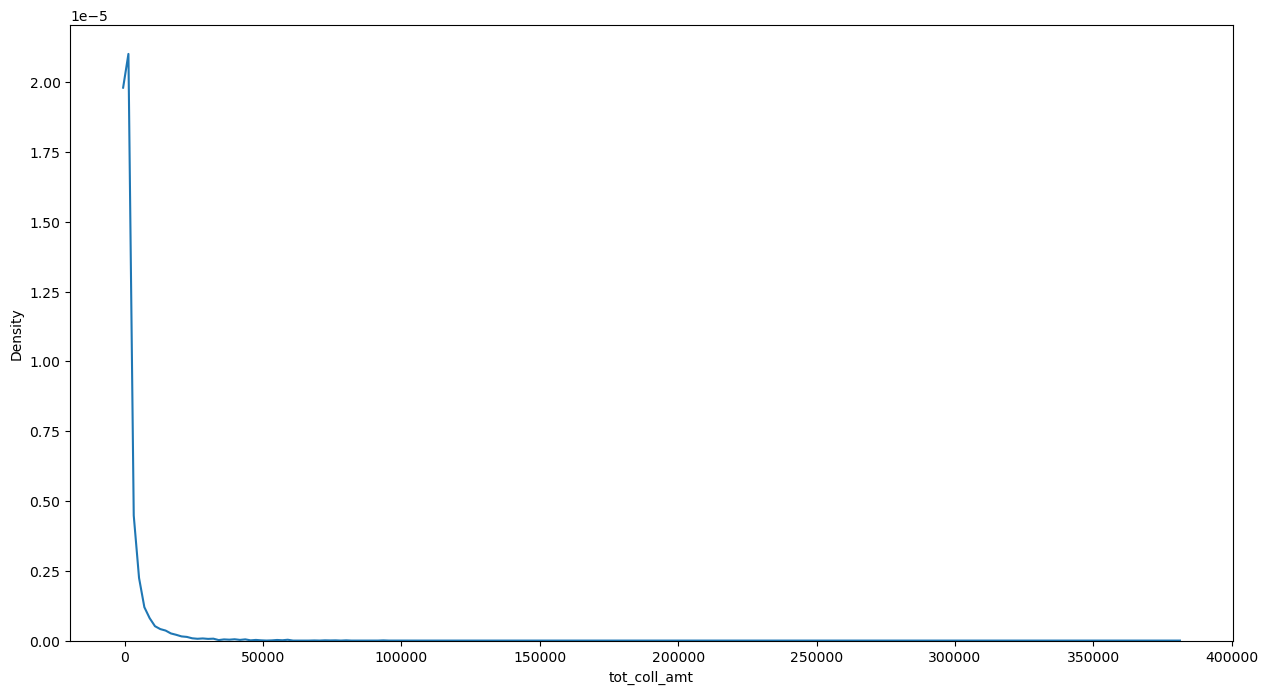

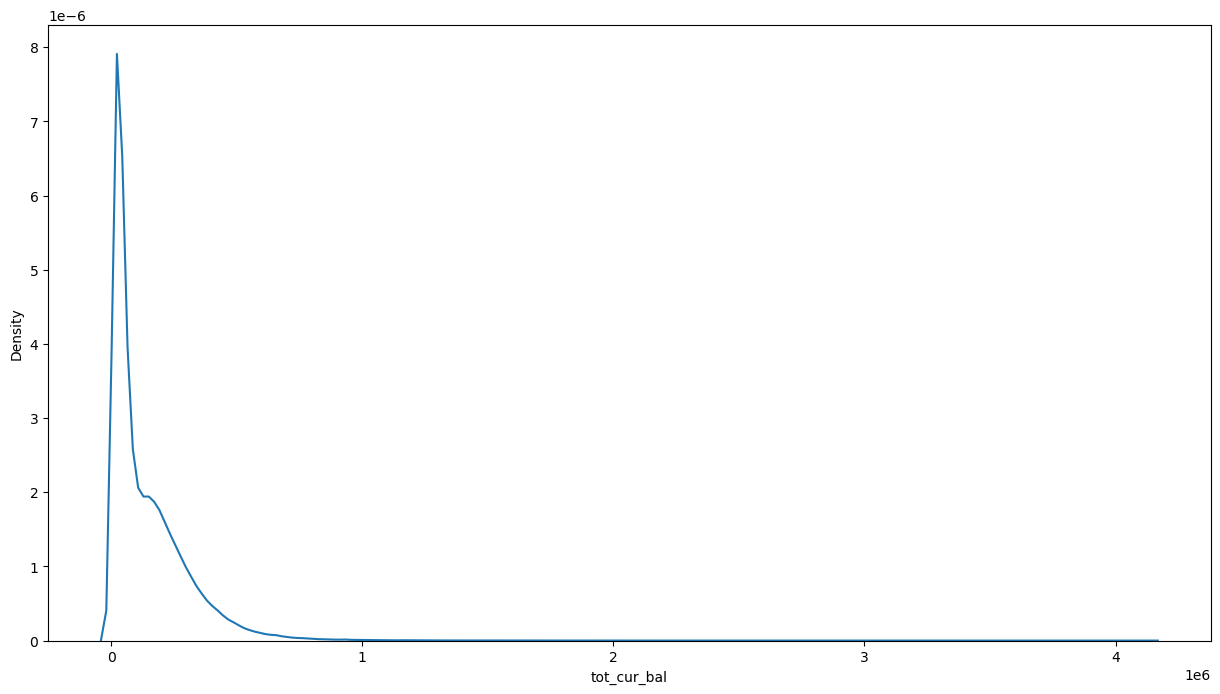

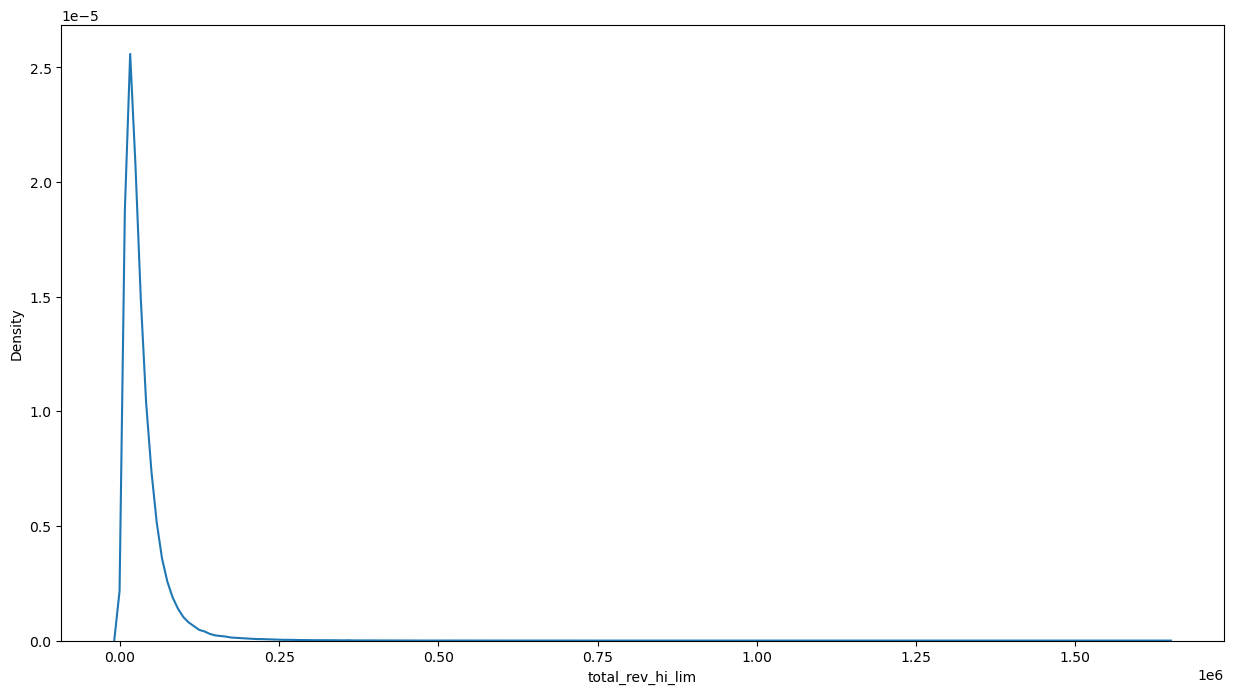

In [45]:
for i in df.select_dtypes(np.number).columns:
    sns.kdeplot(df[i])
    plt.show()

# **Dimensionality Reduction**

(Scrutinizing the columns based on the data defintion, we will be doing our first level of removing the unneccessary columns)

- **'id' and 'member_id'** columns are dropped because these are identifier columns for every loan and borrower respectively and has all unique values in it.
- **'funded_amount'** is dropped as it is a redundant column, which has perfect 1 corelation with loan_amount.
- **'annual_inc_joint' and 'dti_joint'** were dropped because they had almost 99.8% of the values missing.
- **'mths_since_last_major_derog'** was dropped because it had 70% of the data missing.
- **mths_since_last_delinq** is dropped because it had almost 50% data missing in it.

In [46]:
df['emp_title'].nunique()

69666

- **'emp_title'** was dropped because it had too many unique values (69,666) for a categorical column that identifies the borrrower 

In [47]:
temp=['next_pymnt_d', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d']
for i in temp:
    print(i)
    print(df[i].unique())
    print()

next_pymnt_d
[nan 'Feb-16' 'Mar-16' 'Jan-16']

issue_d
['Sep-15' 'Aug-15' 'Jul-15' 'Jun-15' 'May-15' 'Apr-15' 'Mar-15' 'Feb-15'
 'Jan-15' 'Dec-15' 'Nov-15' 'Oct-15']

last_credit_pull_d
['Jan-16' 'Sep-15' 'Dec-15' 'Oct-15' 'Aug-15' 'Nov-15' 'Jun-15' 'Jul-15'
 'May-15' 'Apr-15' 'Feb-15' 'Mar-15' 'Jan-15' nan]

last_pymnt_d
[nan 'Oct-15' 'Sep-15' 'Nov-15' 'Aug-15' 'Jan-16' 'Dec-15' 'Jul-15'
 'Jun-15' 'May-15' 'Apr-15' 'Mar-15' 'Feb-15']



- **'next_pymnt_d'** was dropped because it was the date of next payment and hence not useful for analysis
- **'issue_d'** was dropped because it was the date of loan issue and that too of 2015 only and hence not useful for analysis
- **'last_credit_pull_d'** was dropped because it was the date of last credit pull and that too of 2016 only and hence not useful for analysis
- **'last_pymnt_d'** was dropped because it was the date of last payment and that too of 2015-2016 only and hence not useful for analysis

In [77]:
df.drop(columns=['id','member_id', 'funded_amnt', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'issue_d', 
                 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d','emp_title', 'mths_since_last_delinq'], inplace=True)

In [78]:
df.shape

(212999, 37)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   212999 non-null  int64  
 1   term                        212999 non-null  int32  
 2   int_rate                    212999 non-null  float64
 3   installment                 212999 non-null  float64
 4   grade                       212999 non-null  object 
 5   sub_grade                   212999 non-null  object 
 6   emp_length                  212999 non-null  object 
 7   home_ownership              212999 non-null  object 
 8   annual_inc                  212999 non-null  float64
 9   verification_status         212999 non-null  object 
 10  loan_status                 212999 non-null  object 
 11  purpose                     212999 non-null  object 
 12  title                       212999 non-null  object 
 13  dti           

**So there are now 28 numeric and 9 categorical columns**

**Multicolinearity Test**

<Figure size 3750x2000 with 0 Axes>

<Figure size 3500x2000 with 0 Axes>

<Figure size 3750x2000 with 0 Axes>

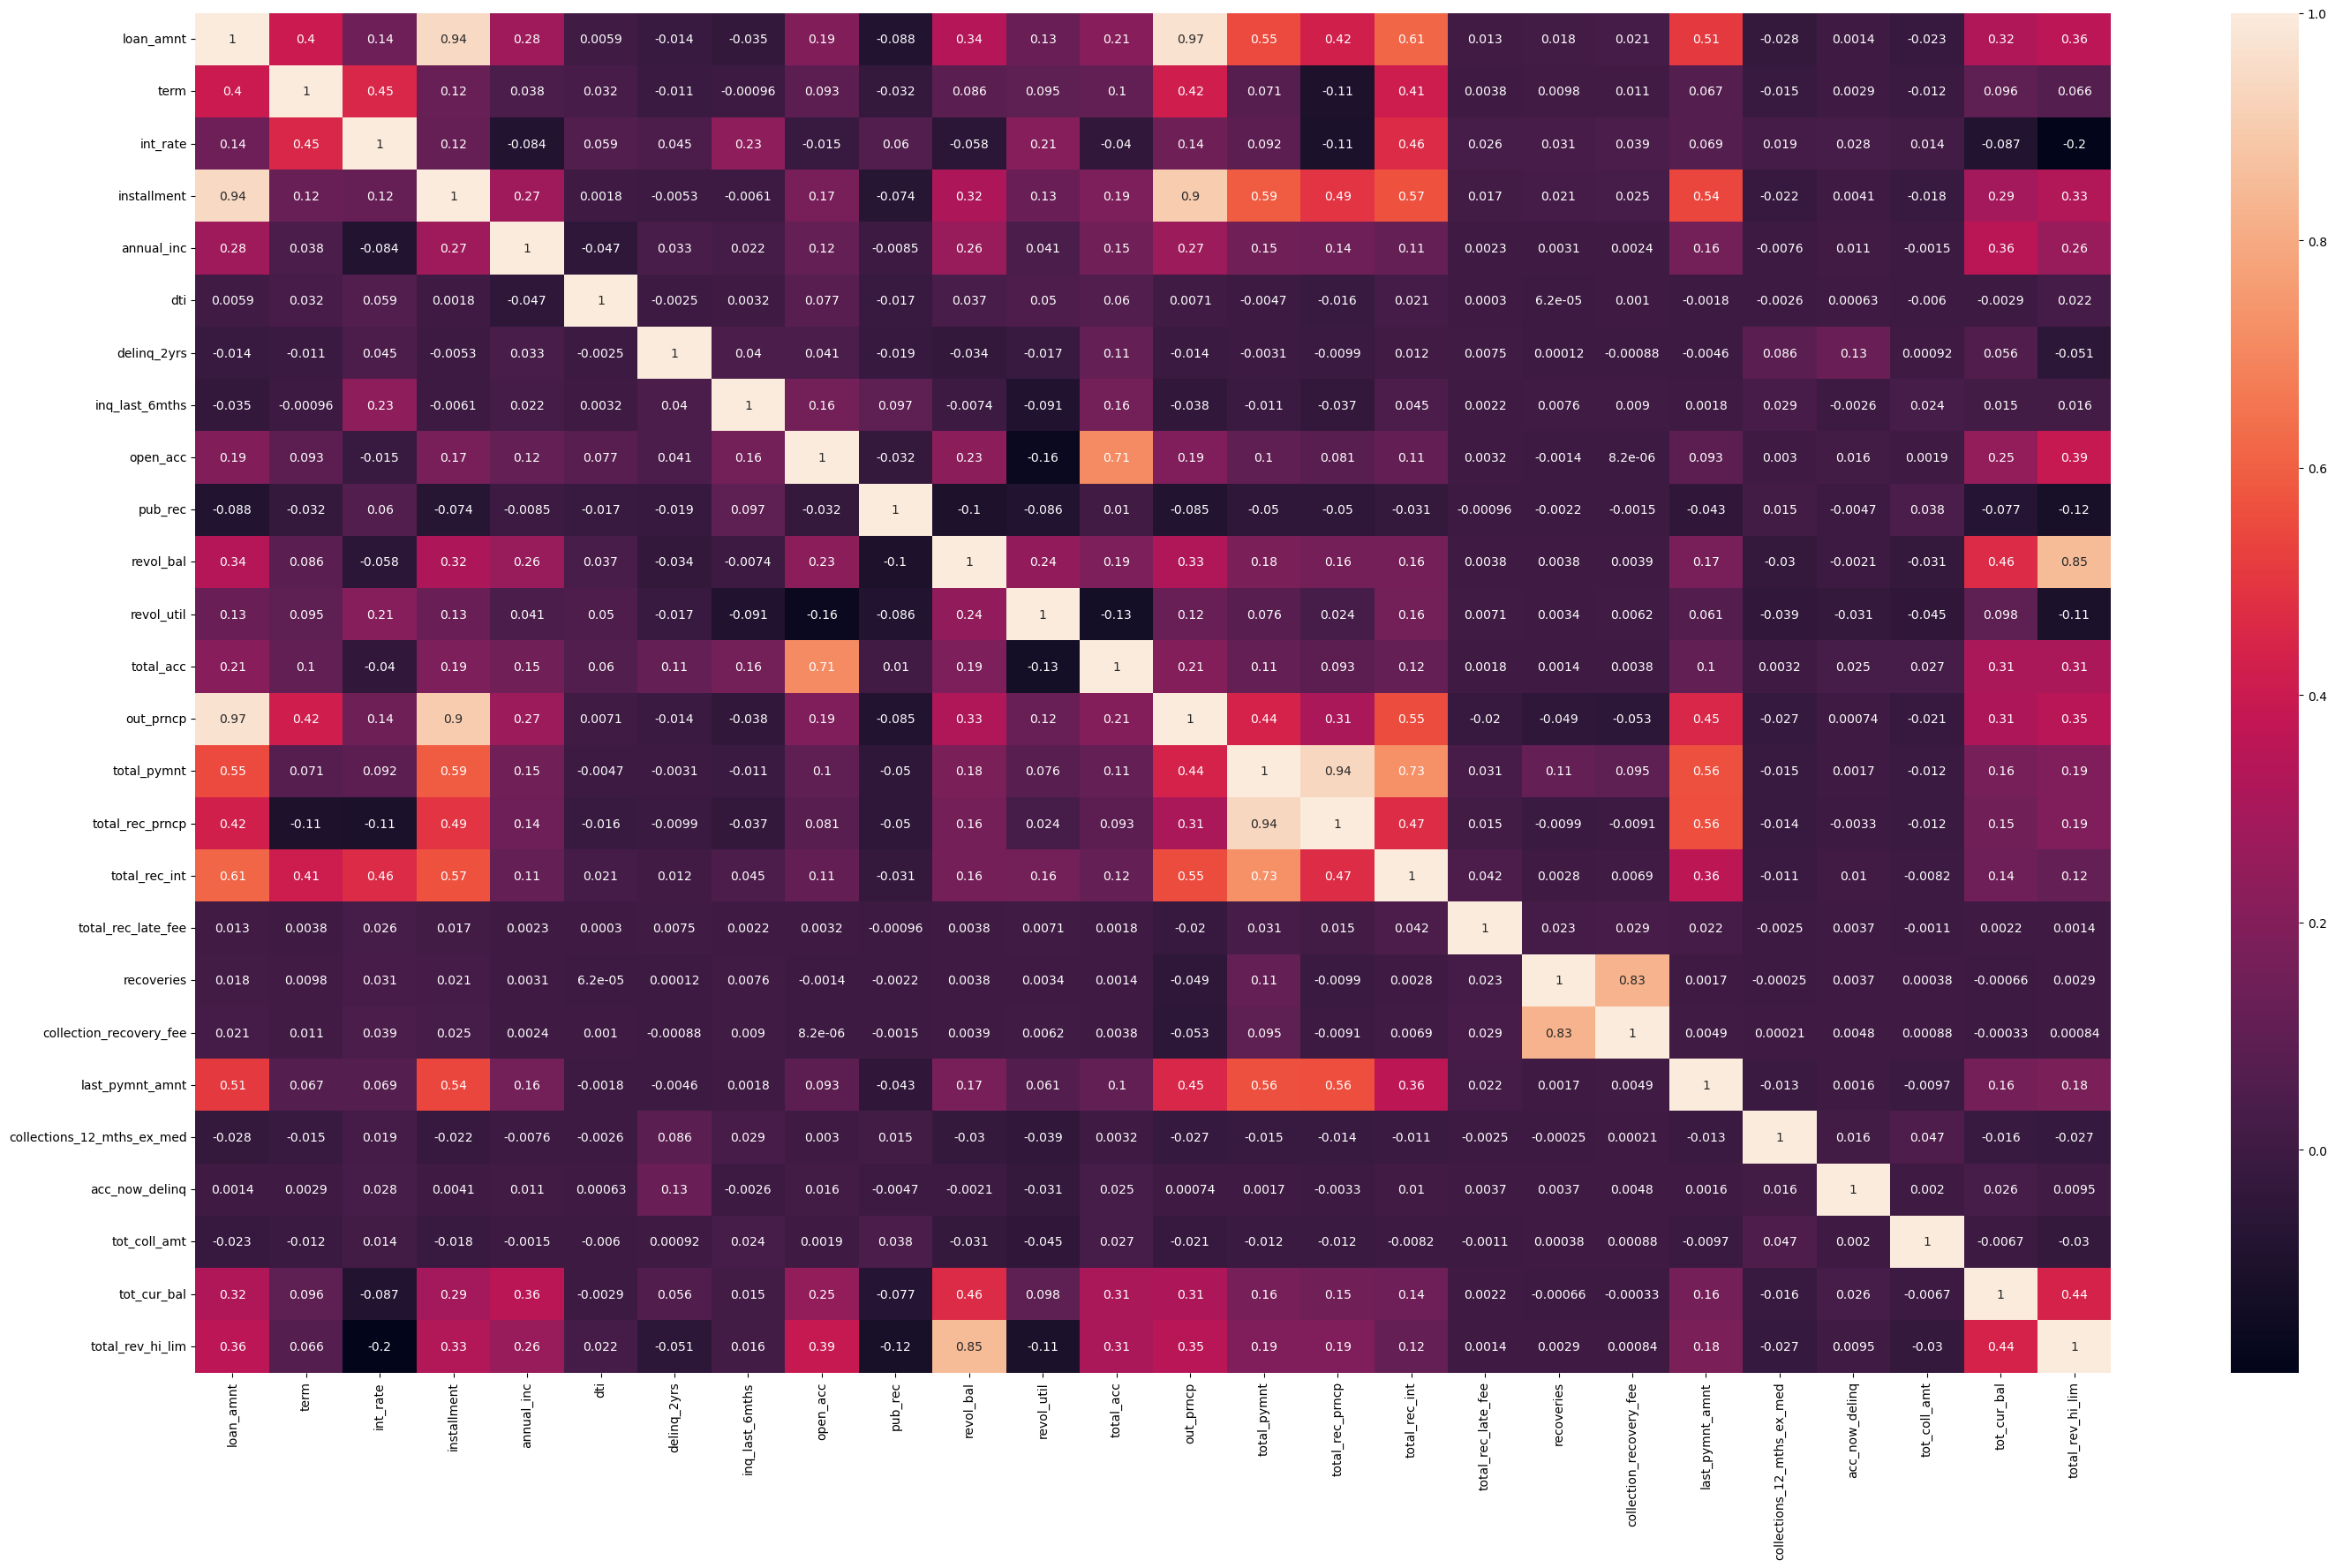

In [79]:
plt.figure(dpi=250)

plt.figure(figsize=(35,20))

sns.heatmap(df.corr(), annot=True)
plt.show()

**Inference**

- From the heatmap we can see, there exists strong multicolinearity between some of the features
- As a solution to this, drop some of the correlated predictors and then check for multicolineraity again 

<Figure size 3750x2000 with 0 Axes>

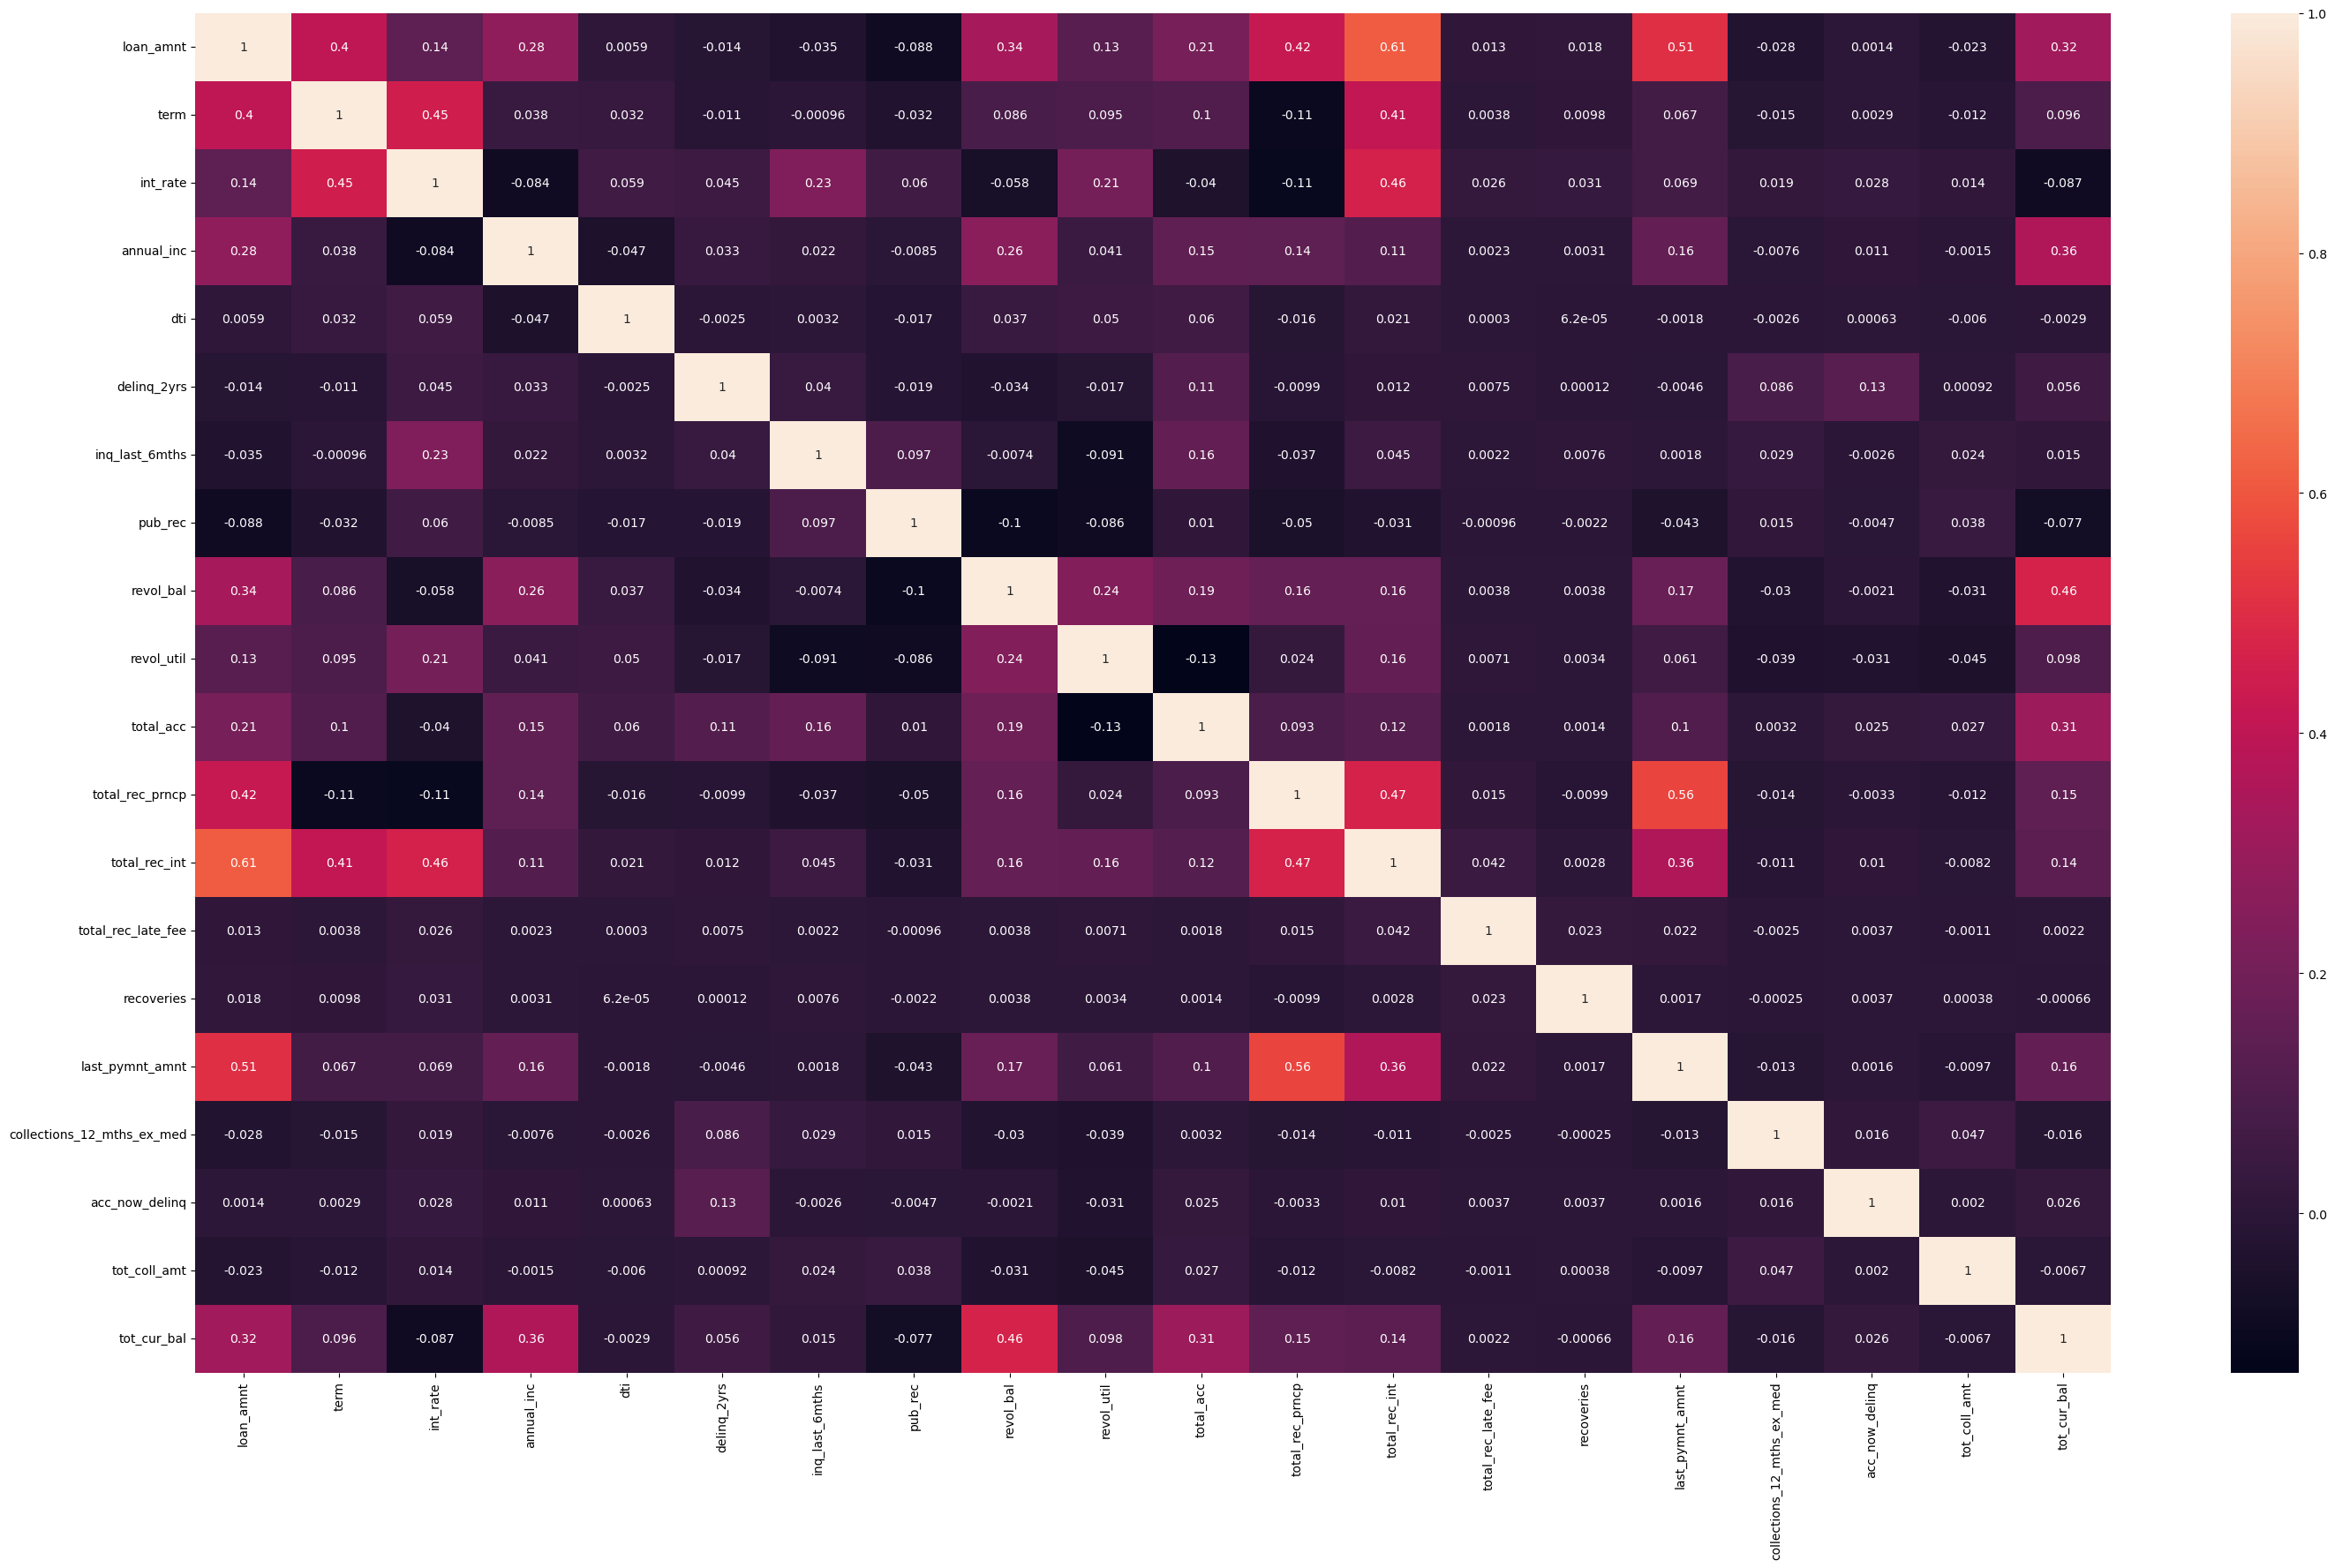

In [80]:
plt.figure(dpi=250)
plt.figure(figsize=(35,20))
sns.heatmap(df.drop(columns=['out_prncp', 'open_acc', 'total_rev_hi_lim', 'installment', 'total_pymnt', 
                             'collection_recovery_fee']).corr(), annot=True)
plt.show()

In [81]:
df.drop(columns=['out_prncp', 'open_acc', 'total_rev_hi_lim', 'installment', 'total_pymnt', 'collection_recovery_fee'], inplace=True)

**Inferences**
- As we can see from the heatmap, the multicolinearity issue is resolved 
- Considering the cut-off as 0.65, there is no strong corelation between any two features of our dataframe 

### Base Model 

In [139]:
y = df['loan_status']
X = df.drop(columns='loan_status')

In [140]:
num_cols = X.select_dtypes(np.number).columns
cat_cols = X.select_dtypes(object).columns

In [141]:
le = LabelEncoder()
for i in cat_cols:
    X[i]=le.fit_transform(X[i])

In [142]:
smote=SMOTE(sampling_strategy=0.1)

X_sm,y_sm=smote.fit_resample(X, y)

In [143]:
y_sm.value_counts()

Current        210226
Charged Off     21022
Name: loan_status, dtype: int64

In [144]:
y_sm=y_sm.apply(lambda x : 0 if x=='Current' else 1)

In [145]:
y_sm.value_counts()

0    210226
1     21022
Name: loan_status, dtype: int64

In [146]:
import statsmodels.api as sm

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm)

In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(173436, 30)
(173436,)
(57812, 30)
(57812,)


In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_reg=LogisticRegression()
log_reg_full=log_reg.fit(X_train, y_train)

In [151]:
ypred_lr_full_test = log_reg_full.predict(X_test)

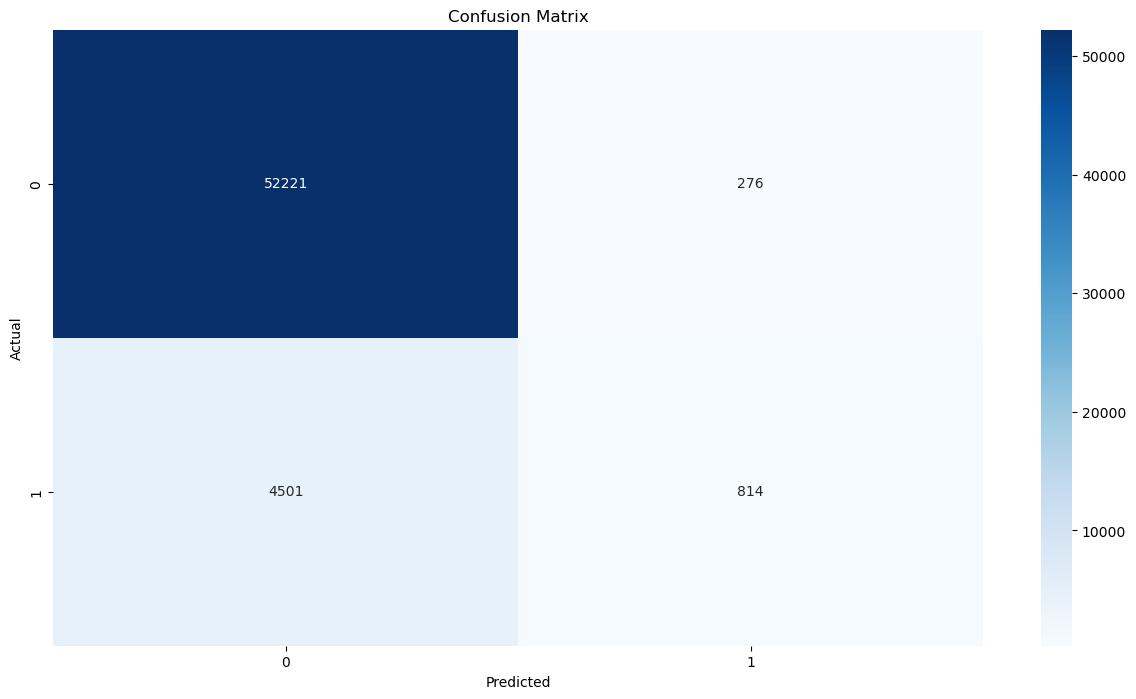

In [152]:
# confusion matrix in graphical form
cm = confusion_matrix(y_test, ypred_lr_full_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [155]:
print(classification_report(y_test, ypred_lr_full_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     52497
           1       0.75      0.15      0.25      5315

    accuracy                           0.92     57812
   macro avg       0.83      0.57      0.61     57812
weighted avg       0.90      0.92      0.89     57812



### Leranings from Base Model

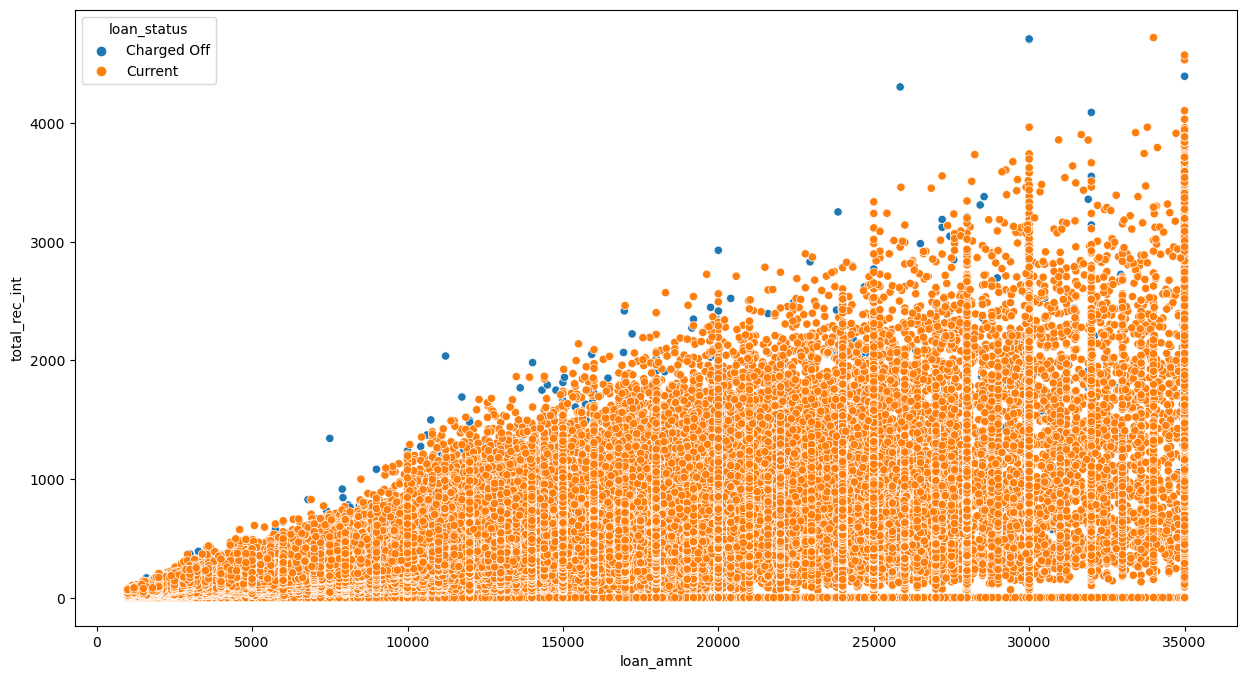

In [99]:
sns.scatterplot(x=df['loan_amnt'], y=df['total_rec_int'], hue=df['loan_status'])
plt.show()

**Inference**

- There is a clear over-lap which we can see, hence we can easily deduce that the performance of any linear model on this dataset will be poor and hence we choose to select a non-linear model


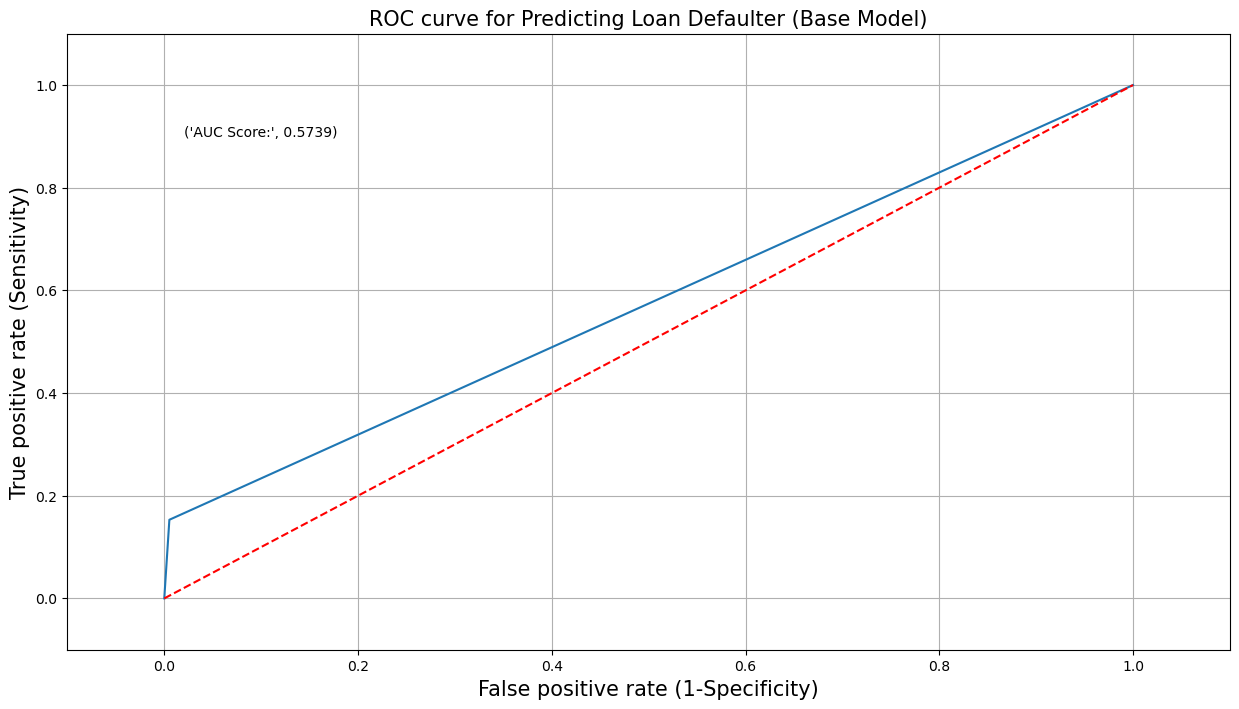

In [156]:
import sklearn.metrics as metrics

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, ypred_lr_full_test)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Predicting Loan Defaulter (Base Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ypred_lr_full_test),4)))
                               
# plot the grid
plt.grid(True)
plt.show()

**Selecting 10 Best Numeric and  5 Best Categorical Columns for Model Building**

In [102]:
#drop categorical columns
X=df.drop(columns=['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type'])
y=df['loan_status']
bestfeatures = SelectKBest(f_classif,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
14          recoveries  14044.200007
13  total_rec_late_fee   3666.524863
2             int_rate   2362.023493
12       total_rec_int    753.914631
6       inq_last_6mths    238.485566
1                 term     90.833354
19         tot_cur_bal     89.457789
9           revol_util     45.140531
3           annual_inc     24.130755
8            revol_bal     17.212271


**Encoding the categorical variables**

**Note**
- we chose label encoder because few columns had more than 3 categories and hence one hot encoding would have increased the number of columns

In [103]:
le = LabelEncoder()
cat_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'earliest_cr_line', 
       'initial_list_status', 'application_type']
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [104]:
df.head()

loan_amnt  term  int_rate  grade  sub_grade  emp_length  home_ownership  \
0      20000    36     12.29      2         10           0               2   
1      11000    36     12.69      2         11           7               1   
2       7000    36      9.99      1          7           6               1   
3      10000    36     10.99      1          8           1               1   
4       9550    36     19.99      4         23           1               3   

   annual_inc  verification_status  loan_status  ...  total_rec_prncp  \
0     65000.0                    1  Charged Off  ...             0.00   
1     40000.0                    1  Charged Off  ...          9942.67   
2     32000.0                    1  Charged Off  ...           167.56   
3     48000.0                    1  Charged Off  ...           235.76   
4     32376.0                    2  Charged Off  ...           195.78   

   total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
0           0.00                 0.0         0.0             0.00   
1         100.81                 0.0         0.0         10059.00   
2          54.40                 0.0         0.0           225.84   
3          79.37                 0.0         0.0           327.34   
4         137.88                 0.0         0.0           354.87   

   collections_12_mths_ex_med  application_type  acc_now_delinq  tot_coll_amt  \
0                           0                 0               0             0   
1                           0                 0               0           332   
2                           0                 0               0             0   
3                           0                 0               0             0   
4                           0                 0               0             0   

   tot_cur_bal  
0        52303  
1       175731  
2       202012  
3       108235  
4        45492  

[5 rows x 31 columns]

In [105]:
X=df[ ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'earliest_cr_line', 
       'initial_list_status', 'application_type'] ]
y=df['loan_status']
bestfeatures = SelectKBest(chi2,k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) 

                 Specs        Score
1            sub_grade  8153.614317
0                grade  1918.376310
8  initial_list_status   312.805615
7     earliest_cr_line   209.510112
5              purpose   132.270373


**The best parameters we have for model building are -**

In [107]:
num_cols = ['recoveries', 'total_rec_late_fee', 'int_rate', 'total_rec_int', 'inq_last_6mths', 'term', 'tot_cur_bal',
           'revol_util', 'annual_inc', 'revol_bal']
cat_cols = ['sub_grade', 'grade', 'initial_list_status', 'earliest_cr_line', 'purpose']

In [108]:
df1=df[['recoveries', 'total_rec_late_fee', 'int_rate', 'total_rec_int', 'inq_last_6mths', 'term', 'tot_cur_bal', 'revol_util', 
       'annual_inc', 'revol_bal', 'sub_grade', 'grade', 'initial_list_status', 'earliest_cr_line', 'purpose', 'loan_status']]

In [109]:
df1['loan_status'].unique()

array(['Charged Off', 'Current'], dtype=object)

In [110]:
df1['loan_status'].value_counts()

Current        210226
Charged Off      2773
Name: loan_status, dtype: int64

In [111]:
df1['loan_status']=df1['loan_status'].apply(lambda x : 0 if x=='Current' else 1)

In [112]:
df1['loan_status'].value_counts()

0    210226
1      2773
Name: loan_status, dtype: int64

In [113]:
df1.head()

recoveries  total_rec_late_fee  int_rate  total_rec_int  inq_last_6mths  \
0         0.0                 0.0     12.29           0.00               1   
1         0.0                 0.0     12.69         100.81               0   
2         0.0                 0.0      9.99          54.40               1   
3         0.0                 0.0     10.99          79.37               2   
4         0.0                 0.0     19.99         137.88               3   

   term  tot_cur_bal  revol_util  annual_inc  revol_bal  sub_grade  grade  \
0    36        52303        77.0     65000.0      31578         10      2   
1    36       175731        38.8     40000.0       5084         11      2   
2    36       202012        74.0     32000.0      12070          7      1   
3    36       108235        66.0     48000.0      22950          8      1   
4    36        45492        29.6     32376.0       4172         23      4   

   initial_list_status  earliest_cr_line  purpose  loan_status  
0                    1               595        2            1  
1                    1               597        2            1  
2                    0               168        2            1  
3                    0               594        1            1  
4                    1               541        2            1

In [114]:
df1.shape

(212999, 16)

**Checking the distribution in the target variable**

In [115]:
df1['loan_status'].value_counts()

0    210226
1      2773
Name: loan_status, dtype: int64

In [116]:
100*df1['loan_status'].value_counts(normalize=True)

0    98.698116
1     1.301884
Name: loan_status, dtype: float64

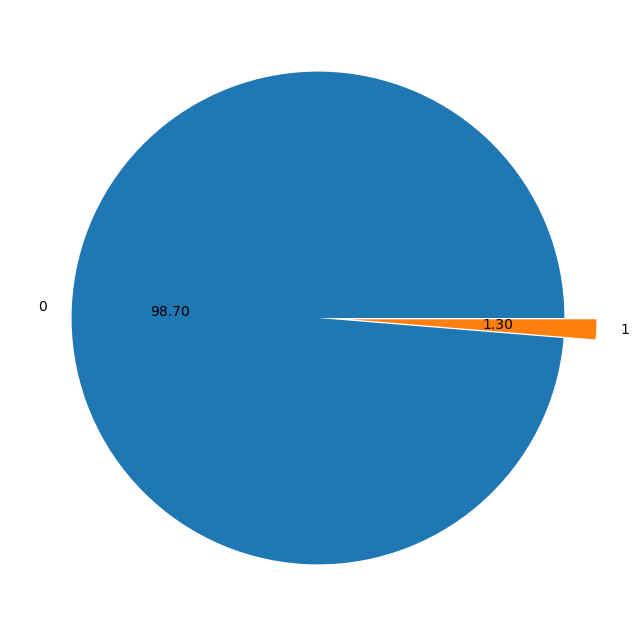

In [117]:
plt.pie(df1['loan_status'].value_counts(), labels=df1['loan_status'].value_counts().index, autopct='%.2f', explode=[0,0.13])
plt.show()

**Now we use SMOTE techinque to oversample just the minority class to get it as per the market standards (Default rate = 10%)**

In [118]:
smote=SMOTE(sampling_strategy=0.1)

In [119]:
le = LabelEncoder()
cat_cols = df1.select_dtypes(object).columns
for i in cat_cols:
    df1[i]=le.fit_transform(df1[i])

In [120]:
df_x=df1.drop(['loan_status'],axis=1)
df_y=df1['loan_status']
X_sm,y_sm=smote.fit_resample(df_x, df_y)

In [121]:
y_sm.value_counts()

0    210226
1     21022
Name: loan_status, dtype: int64

**Train_Test Split**

In [122]:
X=df1.drop(columns='loan_status')
y=df1['loan_status']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1)

In [124]:
print(f"Our X_train's shape is {X_train.shape}")
print(f"Our X_test's shape is {X_test.shape}")

print()

print(f"Our y_train's shape is {y_train.shape}")
print(f"Our y_test's shape is {y_test.shape}")

Our X_train's shape is (161873, 15)
Our X_test's shape is (69375, 15)

Our y_train's shape is (161873,)
Our y_test's shape is (69375,)


In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [126]:
# Let's fit all the models at once and decide the one to optimize

clfs = {'logreg':LogisticRegression(),
       'knn':KNeighborsClassifier(),
       'NB': GaussianNB(),
       'DecisionTree': DecisionTreeClassifier(),
       'RF':RandomForestClassifier(),
       'AdaB':AdaBoostClassifier(),
       'GradientB':GradientBoostingClassifier(),
       'XGB':XGBClassifier(),
       'svc':SVC()}

model_reports = pd.DataFrame(columns=['model','accuracy','recall','precision','f1'])

In [129]:
for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    print(f'fitting model {clf_name}')
    t=pd.Series({
        'model':clf_name,
        'accuracy':accuracy_score(y_test,y_test_pred),
        'recall':recall_score(y_test,y_test_pred),
        'precision':precision_score(y_test,y_test_pred),
        'f1':f1_score(y_test,y_test_pred)
    })
    model_reports = model_reports.append(t,ignore_index=True)

model_reports = model_reports.sort_values(by='f1',ascending=False)

fitting model logreg
fitting model knn
fitting model NB
fitting model DecisionTree
fitting model RF
fitting model AdaB
fitting model GradientB
fitting model XGB
fitting model svc


In [130]:
print(model_reports)
# These are the results with SMOTE (0.1) and models consisting 16 features

          model  accuracy    recall  precision        f1
7           XGB  0.992822  0.925862   0.996138  0.959715
3  DecisionTree  0.984605  0.919775   0.914069  0.916913
4            RF  0.984706  0.840643   0.992628  0.910336
6     GradientB  0.970724  0.685188   0.996821  0.812136
5          AdaB  0.956598  0.538786   0.984036  0.696319
1           knn  0.927596  0.538630   0.625408  0.578784
2            NB  0.923402  0.190417   0.905716  0.314676
0        logreg  0.922177  0.174809   0.909091  0.293232
8           svc  0.907719  0.000936   0.857143  0.001871


### Final model

In [131]:
rf=RandomForestClassifier()
model=rf.fit(X_train, y_train)

In [132]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [133]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

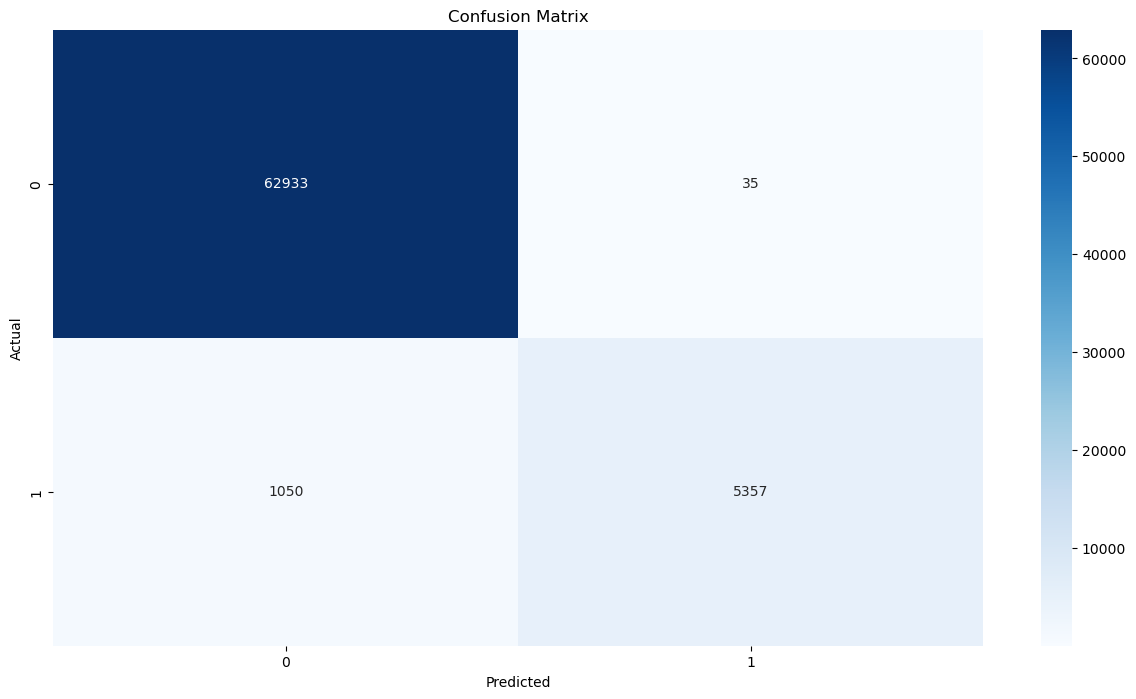

In [134]:
y_pred = model.predict(X_test)
# confusion matrix in graphical form
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147258
           1       1.00      1.00      1.00     14615

    accuracy                           1.00    161873
   macro avg       1.00      1.00      1.00    161873
weighted avg       1.00      1.00      1.00    161873



In [136]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     62968
           1       0.99      0.84      0.91      6407

    accuracy                           0.98     69375
   macro avg       0.99      0.92      0.95     69375
weighted avg       0.98      0.98      0.98     69375



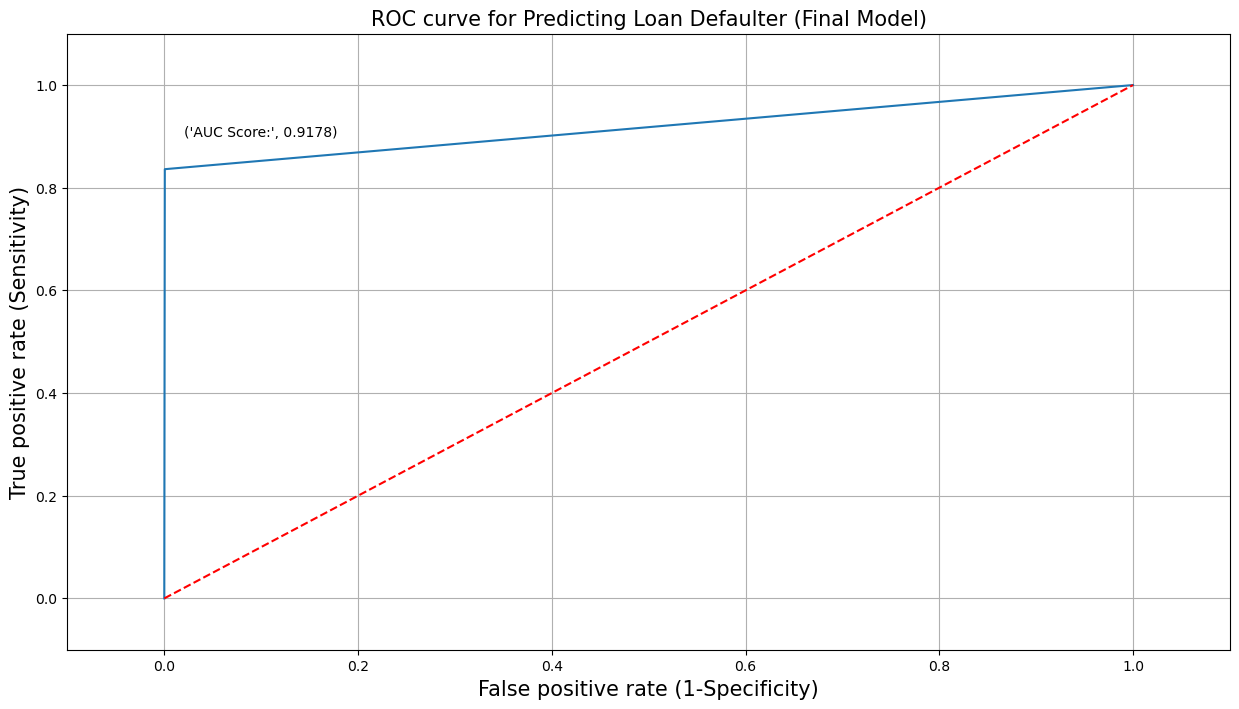

In [137]:
import sklearn.metrics as metrics

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Predicting Loan Defaulter (Final Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

plt.show()

--------------------------------

### Project Insights from Final Model (Random Forest)

In this project, we embarked on a comprehensive journey to predict loan defaulters, a critical task in the realm of financial risk management. Our objective was to build a robust predictive model that could effectively identify potential loan defaulters while maintaining a high level of precision and recall. Let's delve into the insights gained and the pivotal transformations undertaken from the initial base model (Logistic Regression) to the final model (Random Forest).

**Base Model: Logistic Regression**

Our initial foray involved the creation of a base model using Logistic Regression. This model offered valuable insights, revealing the nature of linear relationships between features and the target variable. However, its performance was constrained by the inherent assumptions of linearity and lack of flexibility, as evidenced by the ROC AUC score of 0.5739. The classification report demonstrated a notable imbalance between precision and recall, with the model being more conservative in classifying loan defaulters.

**Enhancements and Learnings**

- Feature Selection: We meticulously assessed the significance of each feature using statistical tests and domain knowledge. The selection process culminated in the inclusion of 10 numeric and 5 categorical features that had the most pronounced impact on the target variable. This strategic reduction of dimensions improved model interpretability and efficiency.

- Non-linearity and Complex Relationships: As the base model's performance was constrained by linearity, we transitioned to the Random Forest algorithm, known for its ability to capture intricate non-linear relationships. This shift allowed us to better model the complex interactions among features, leading to significant performance improvements.

- Handling Class Imbalance: To address the class imbalance issue, we employed Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class. This balanced the dataset, enhancing the model's ability to recognize loan defaulters more effectively and mitigating the risk of overestimating precision.

**Final Model: Random Forest**

The Random Forest model emerged as our final choice due to its remarkable ability to capture non-linear patterns, handle multicollinearity, and address class imbalances. The model's ROC AUC score soared to 0.9178, indicative of its superior discriminatory power. This implies that the Random Forest model can more accurately rank positive and negative instances, thus optimizing its classification performance.

**Comparison of Classification Reports**

The classification report for the final Random Forest model showcased a substantial advancement over the base model. Notably, the precision-recall trade-off was considerably more balanced, with the final model demonstrating higher recall (84%) compared to the base model (15%), while maintaining respectable precision (99%).

**In Summation**

Our journey culminated in a sophisticated Random Forest model that leverages non-linearity and data-driven insights to enhance its predictive accuracy. By thoughtfully selecting features, handling class imbalances, and embracing a more advanced algorithm, we not only bolstered our model's performance but also gained deeper insights into the intricate dynamics of loan default prediction. This project underscores the iterative nature of data science, where continuous refinement and adaptation lead to more impactful and accurate models.